## Load Modules

In [1]:
import numpy as np
import pyemma
from scipy import constants

/Users/arghya/opt/anaconda3/envs/msmbuilder/lib/python3.6/site-packages/pyemma/util/log.py:65: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  D = yaml.load(f2)


In [2]:
import matplotlib.pylab as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina', quality=200)
plt.rcParams["figure.figsize"] = (15,5)

/Users/arghya/opt/anaconda3/envs/msmbuilder/lib/python3.6/site-packages/pyemma/__init__.py:130: UserWarning: You are not using the latest release of PyEMMA. Latest is 2.5.7, you have 2.5.4.
  .format(latest=latest, current=current), category=UserWarning)


In [3]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

In [7]:
# FE is written out in kJ/mol --> kT
# first convert to J/mol
conversion_factor = 1000
# then convert to J by dividing by Avogadro constant (units of mol^-1)
conversion_factor = conversion_factor / constants.N_A
# now convert from J to kT
conversion_factor = conversion_factor / (constants.k * 300)

## AlphaFold Ensemble

In [15]:
colvaraf=np.loadtxt('./COLVAR-AF/COLVAR')

In [16]:
phechi1af=colvar[:, 3]
phechi2af=colvar[:, 4]
trpchi1af=colvar[:, 5]
trpchi2af=colvar[:, 6]
openaf=colvar[:, 10]
trpargaf=colvar[:, 9]

## Metadynamics

### Load COLVAR

In [38]:
colvardriver=np.loadtxt('./Metadynamics/COLVAR-driver')
colvarmeta=np.loadtxt('./Metadynamics/COLVAR')

In [39]:
openmeta=colvardriver[:, 4]
trpargmeta=colvardriver[:, 3]
ctmeta=colvarmeta[:, 9]

In [4]:
metad_fe_trp_chi1 = np.loadtxt("./Metadynamics/fes_trp.dat")[:, 0]
metad_fe_trp_chi2 = np.loadtxt("./Metadynamics/fes_trp.dat")[:, 1]
metad_fetrp = np.loadtxt("./Metadynamics/fes_trp.dat")[:, 2]

In [5]:
metad_trp_chi = np.loadtxt("./Metadynamics/fes_trparg.dat")[:, 0]
metad_fe_open = np.loadtxt("./Metadynamics/fes_trparg.dat")[:, 1]
metad_pop = np.loadtxt("./Metadynamics/fes_trparg.dat")[:, 2]

In [6]:
metad_trp_chiangle = np.loadtxt("./Metadynamics/fes_trpglu.dat")[:, 0]
metad_fe_trpgludist = np.loadtxt("./Metadynamics/fes_trpglu.dat")[:, 1]
metad_poptrpglu = np.loadtxt("./Metadynamics/fes_trpglu.dat")[:, 2]

In [29]:
metad_fe_phe_chi1 = np.loadtxt("./Metadynamics/fes_phe.dat")[:, 0]
metad_fe_phe_chi2 = np.loadtxt("./Metadynamics/fes_phe.dat")[:, 1]
metad_fephe = np.loadtxt("./Metadynamics/fes_phe.dat")[:, 2]

In [9]:
metad_fe_phe_chi1r1 = np.loadtxt("./Metadynamics/fes_phearg.dat")[:, 0]
metad_fe_pheargr1 = np.loadtxt("./Metadynamics/fes_phearg.dat")[:, 1]
metad_fepheargr1 = np.loadtxt("./Metadynamics/fes_phearg.dat")[:, 2]

In [10]:
metad_pi = np.exp(-metad_fetrp * conversion_factor)
metad_pi = metad_pi / np.sum(metad_pi)

In [11]:
metad_poppi = np.exp(-metad_pop * conversion_factor)
metad_poppi = metad_poppi / np.sum(metad_poppi)

In [30]:
metad_pophe = np.exp(-metad_fephe * conversion_factor)
metad_pophe = metad_pophe / np.sum(metad_pophe)

In [13]:
metad_popheargr1 = np.exp(-metad_fepheargr1 * conversion_factor)
metad_popheargr1 = metad_popheargr1 / np.sum(metad_popheargr1)

In [23]:
metad_poptrpglurun = np.exp(-metad_poptrpglu * conversion_factor)
metad_poptrpglur1 = metad_poptrpglurun / np.sum(metad_poptrpglurun)

## Plotting

/Users/arghya/opt/anaconda3/envs/msmbuilder/lib/python3.6/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


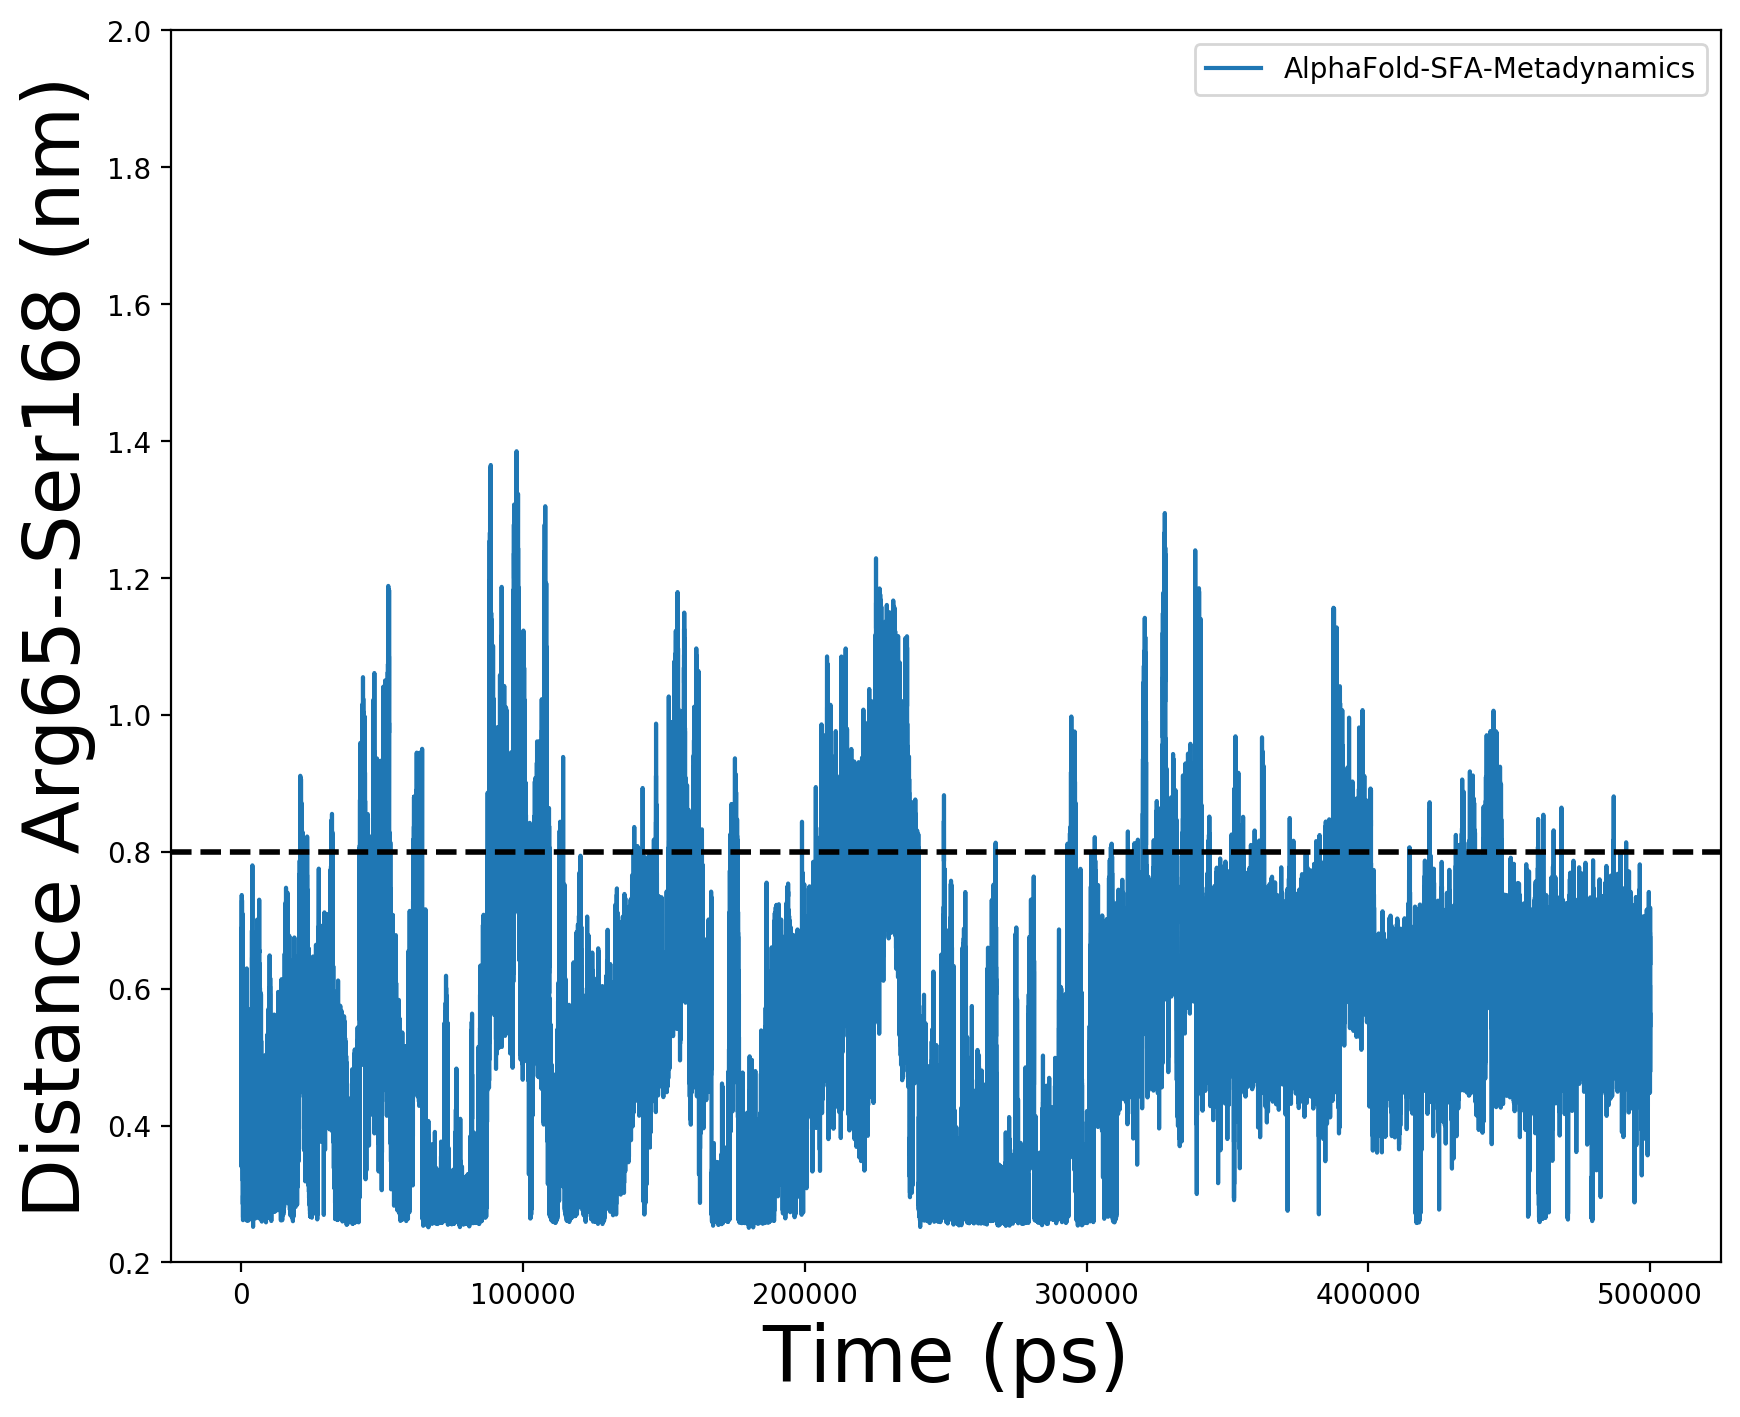

In [19]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.plot(trpargmeta, '', label='AlphaFold-SFA-Metadynamics')
plt.xlabel('Time (ps)', fontsize=28)
ax.set_ylabel('Distance Arg65--Ser168 (nm)', fontsize=28)
ax.set_ylim(0.2, 2.0)
ax.axhline(y=0.8, color='black', linestyle='--', linewidth=2)
plt.legend()

plt.show()

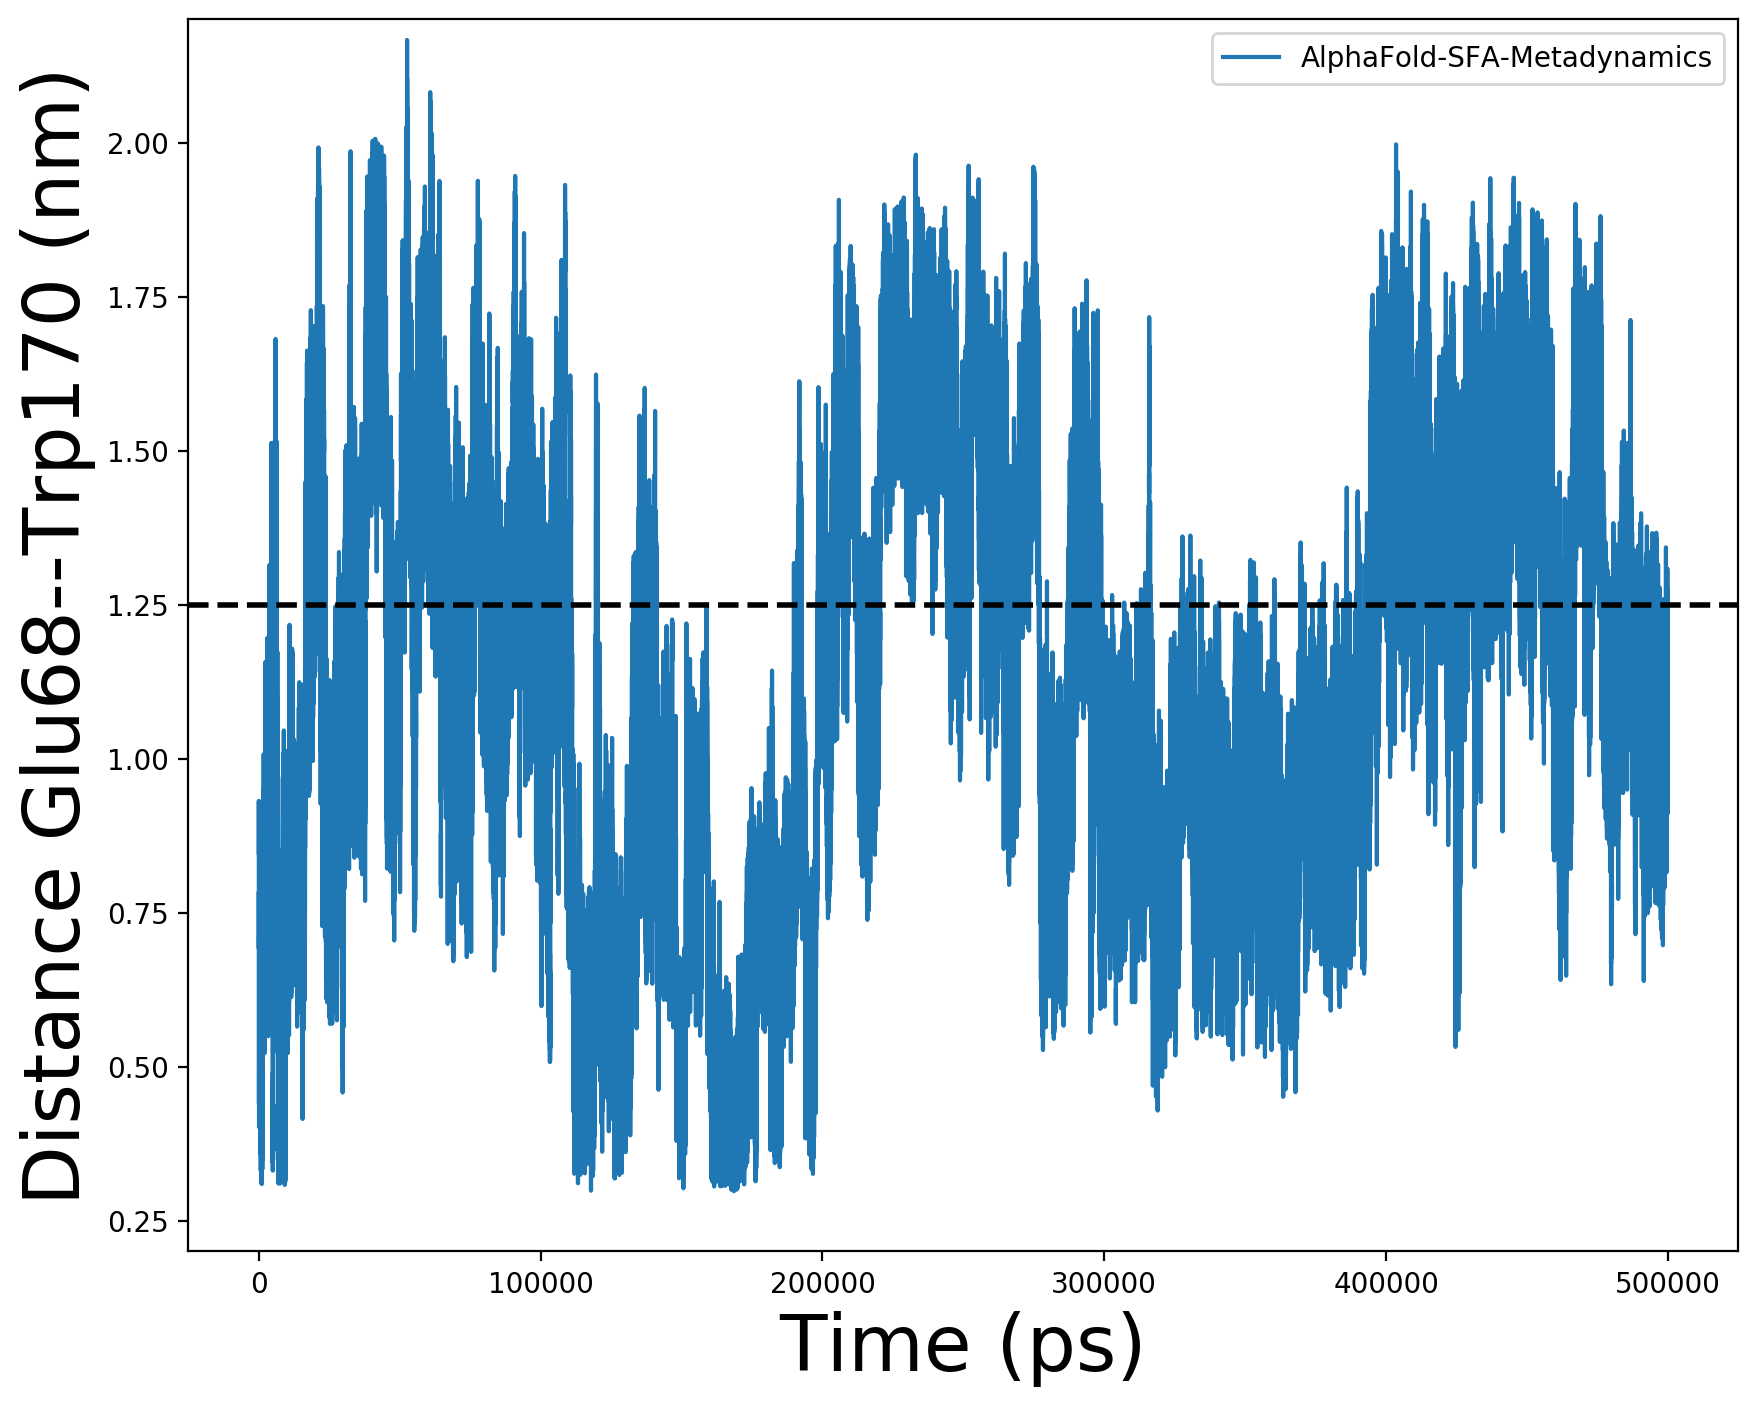

In [20]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.plot(openmeta, '', label='AlphaFold-SFA-Metadynamics')
plt.xlabel('Time (ps)', fontsize=28)
ax.set_ylabel('Distance Glu68--Trp170 (nm)', fontsize=28)
ax.set_ylim(0.2, 2.2)
ax.axhline(y=1.25, color='black', linestyle='--', linewidth=2)
plt.legend()

plt.show()

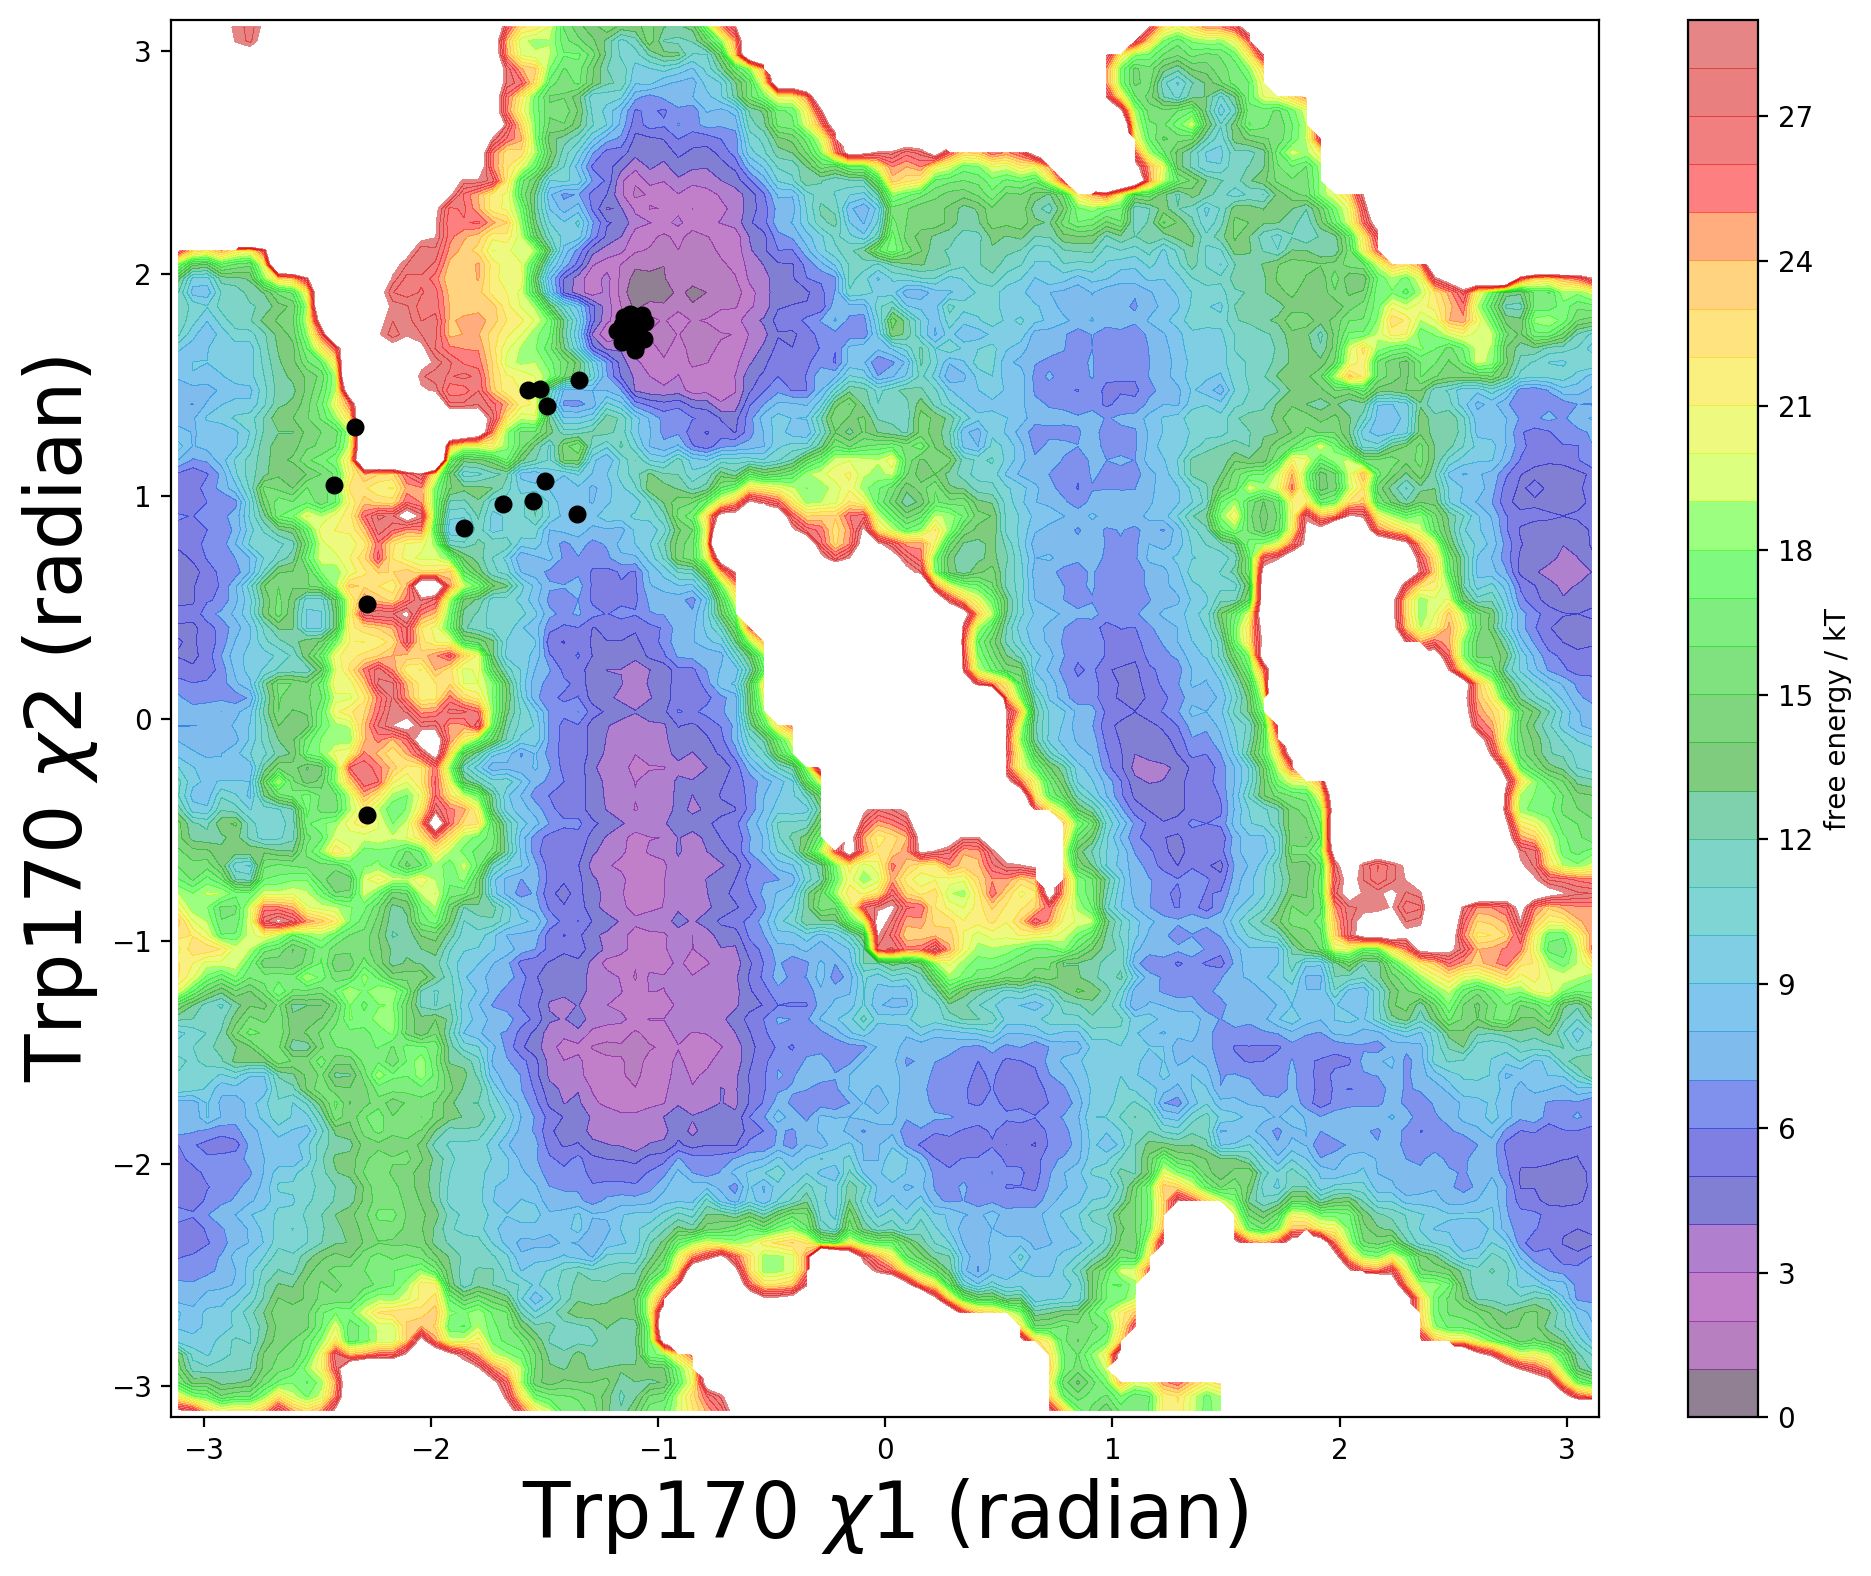

In [21]:
fig, ax = plt.subplots(figsize=(10, 8))
pyemma.plots.plot_free_energy(metad_fe_trp_chi1, metad_fe_trp_chi2, weights=metad_pi, levels=np.arange(0, 30, 1), vmin=0, vmax=30, ax=ax, alpha=0.5)
ax.set_xlabel('Trp170 $\chi1$ (radian)', fontsize=28)
ax.set_ylabel('Trp170 $\chi2$ (radian)', fontsize=28)
ax.set_xlim(-np.pi, np.pi)
ax.set_ylim(-np.pi, np.pi)
#ax.set_title('Starting Normal')
ax.scatter(trpchi1af, trpchi2af, color='black', s=30, marker="o", label='Holo Xtals')
fig.tight_layout()
plt.show()

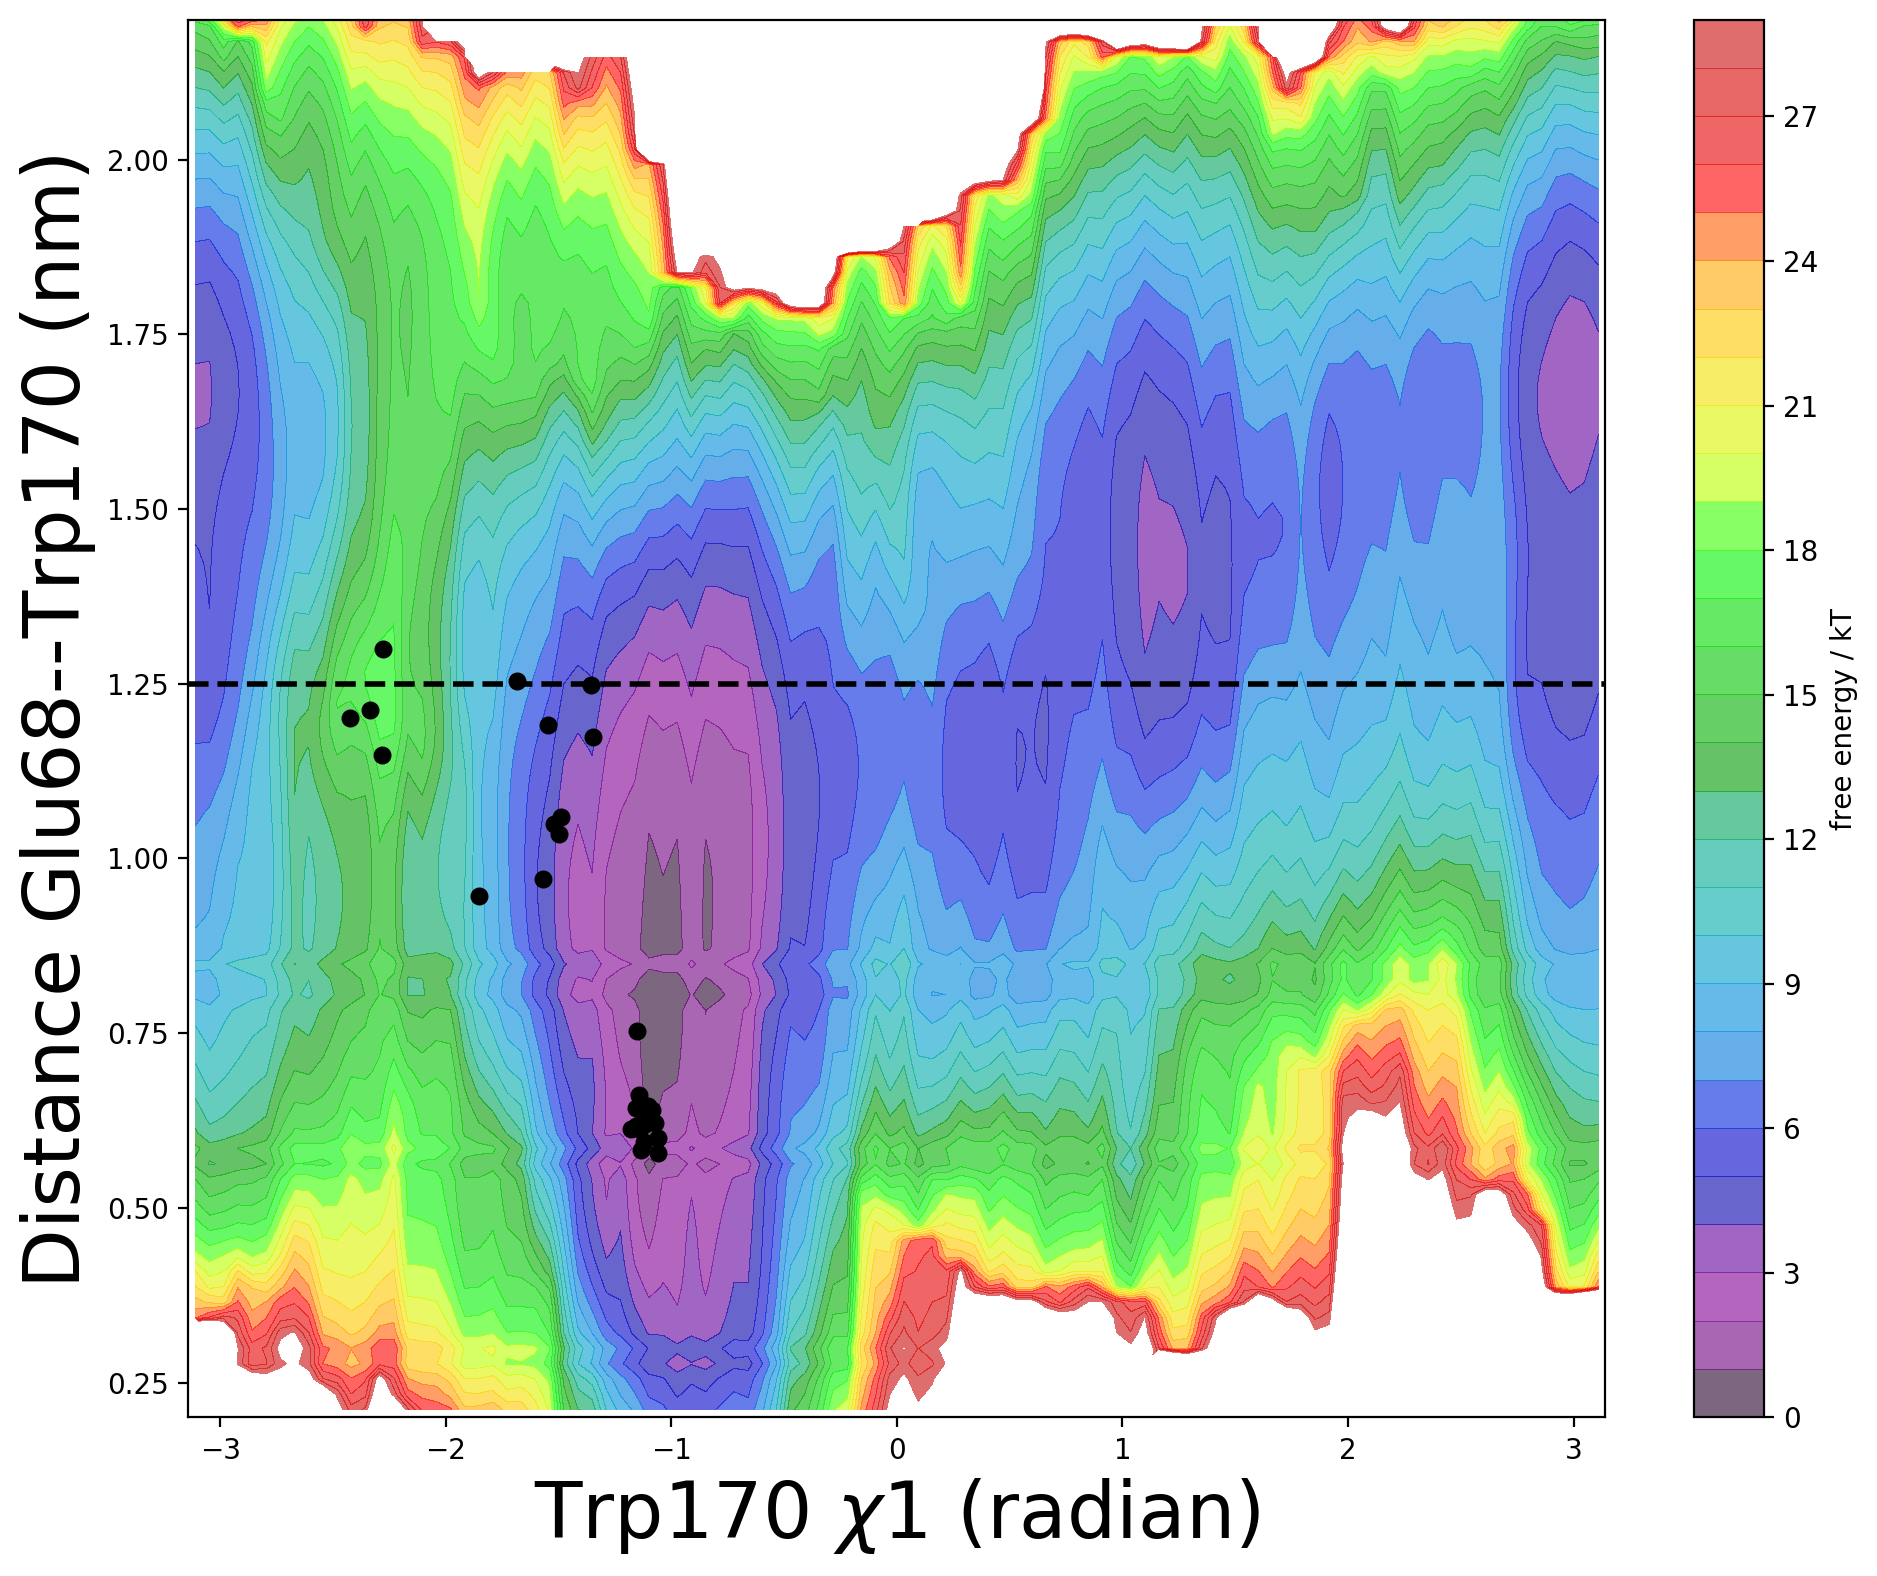

In [31]:
fig, ax = plt.subplots(figsize=(10, 8))
pyemma.plots.plot_free_energy(metad_trp_chiangle, metad_fe_trpgludist, weights=metad_poptrpglur1, ax=ax, levels=np.arange(0, 30, 1), vmin=0, vmax=30, alpha=0.6)
ax.set_xlabel('Trp170 $\chi1$ (radian)', fontsize=28)
ax.set_ylabel('Distance Glu68--Trp170 (nm)', fontsize=28)
ax.set_ylim(0.2, 2.2)
ax.set_xlim(-np.pi, np.pi)
#ax.set_title('Starting Normal')
ax.axhline(y=1.25, color='black', linestyle='--', linewidth=2)
ax.scatter(trpchi1af, openaf, color='black', s=30, marker="o", label='Holo Xtals')
fig.tight_layout()
plt.show()

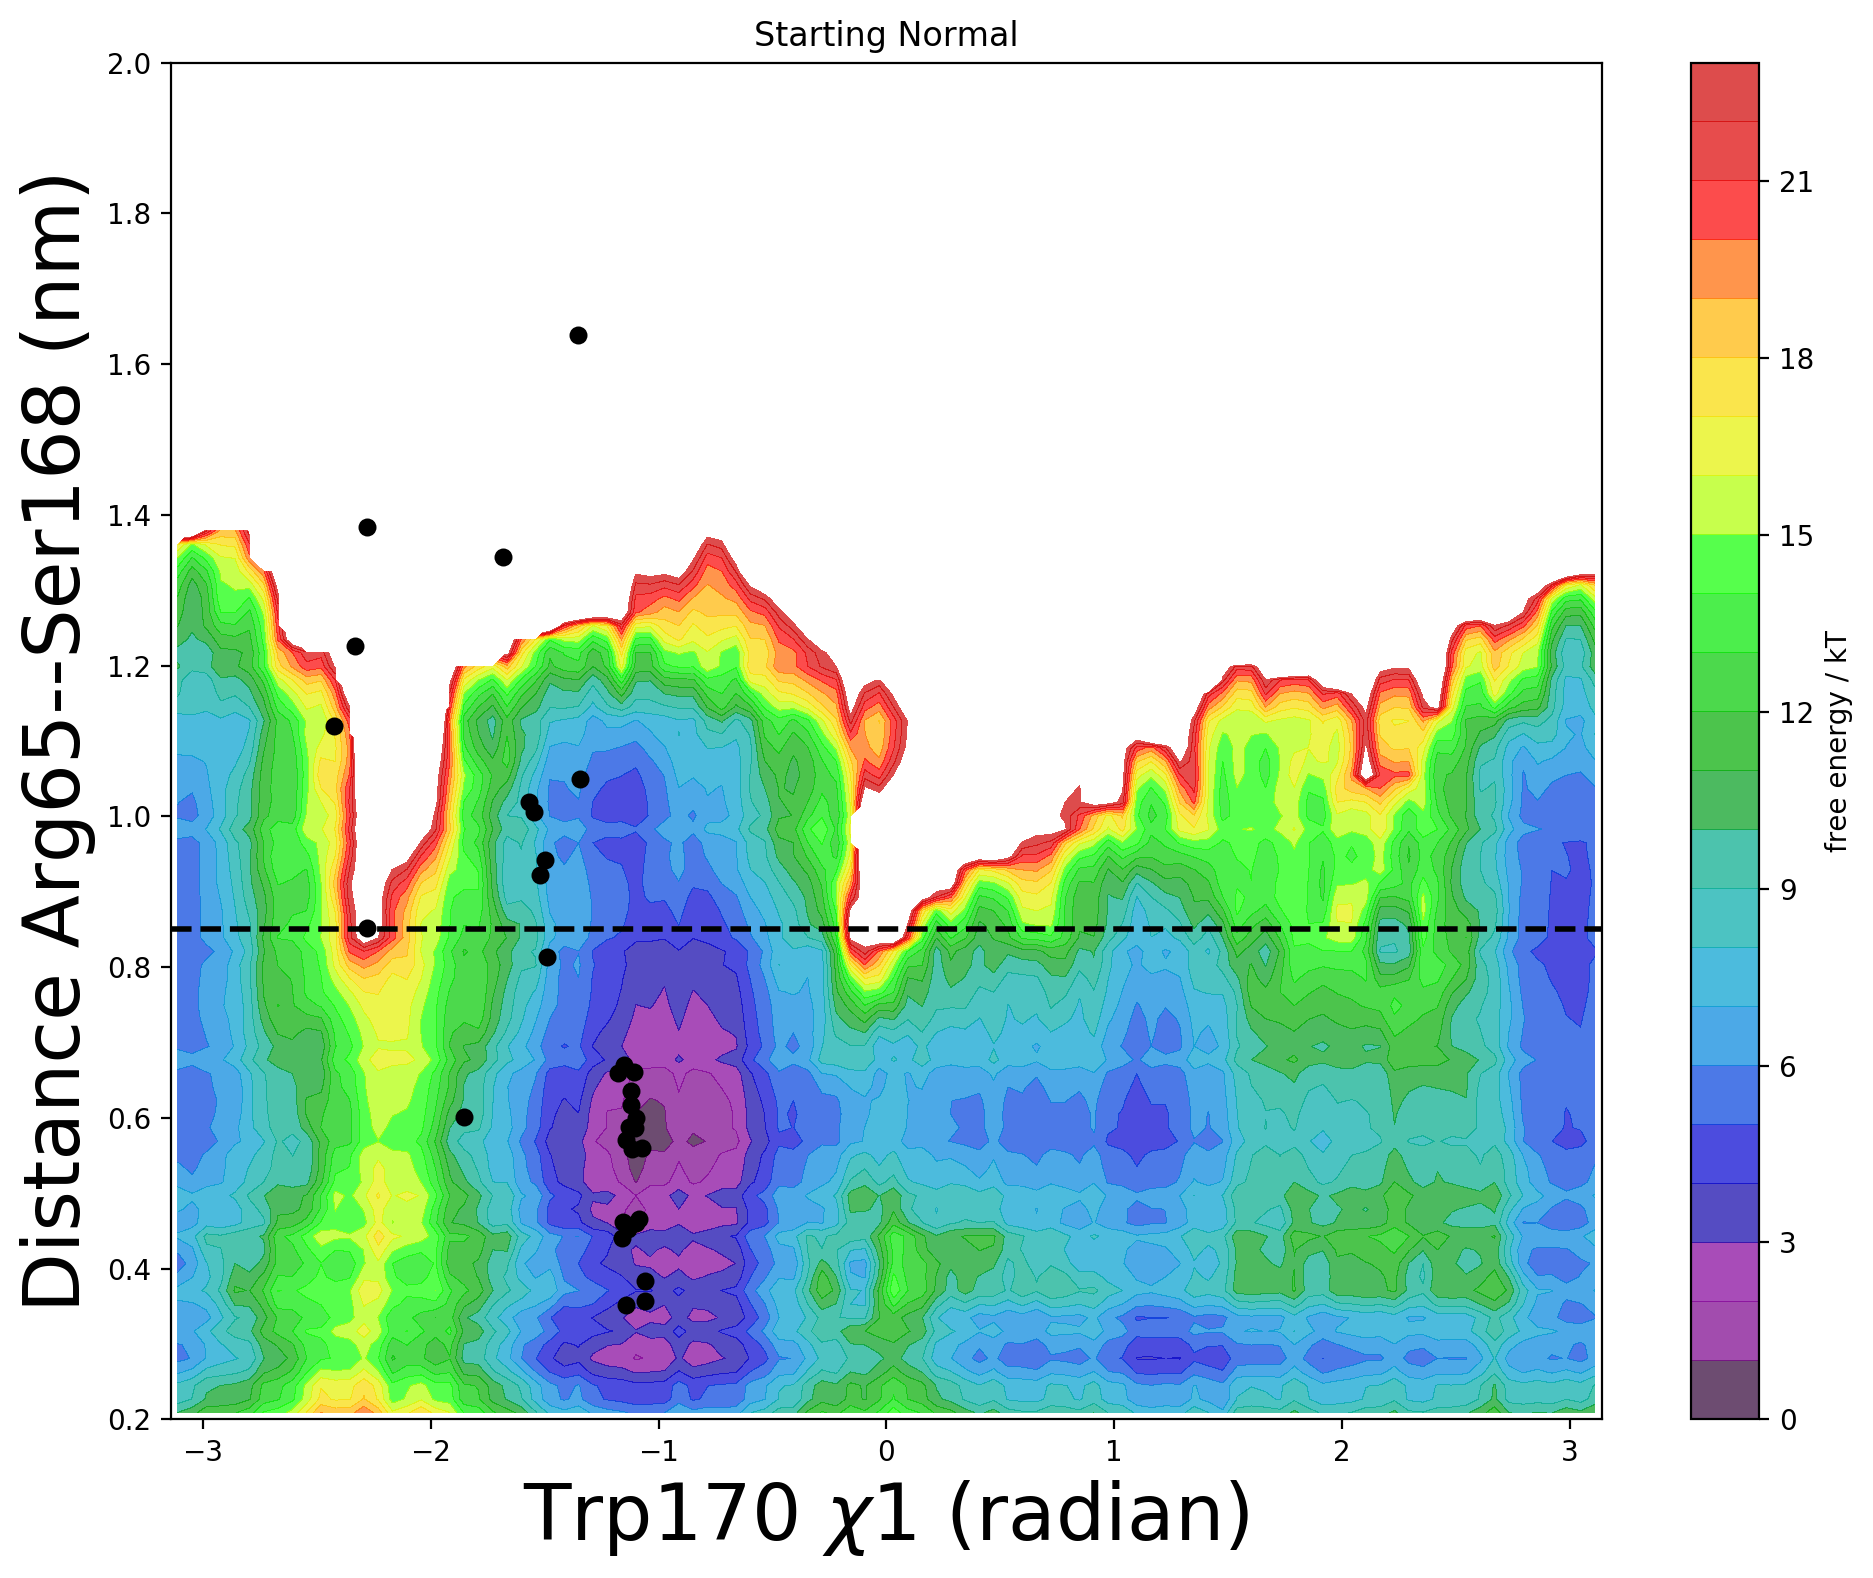

In [25]:
fig, ax = plt.subplots(figsize=(10, 8))
pyemma.plots.plot_free_energy(metad_trp_chi, metad_fe_open, weights=metad_poppi, ax=ax, levels=np.arange(0, 24, 1), vmin=0, vmax=24, alpha=0.7)
ax.set_xlabel('Trp170 $\chi1$ (radian)', fontsize=28)
ax.set_ylabel('Distance Arg65--Ser168 (nm)', fontsize=28)
ax.set_xlim(-np.pi, np.pi)
ax.set_ylim(0.2, 2.0)
ax.set_title('Starting Normal')
ax.axhline(y=0.85, color='black', linestyle='--', linewidth=2)
ax.scatter(trpchi1af, trpargaf, color='black', s=30, marker="o", label='Holo Xtals')
fig.tight_layout()
plt.show()

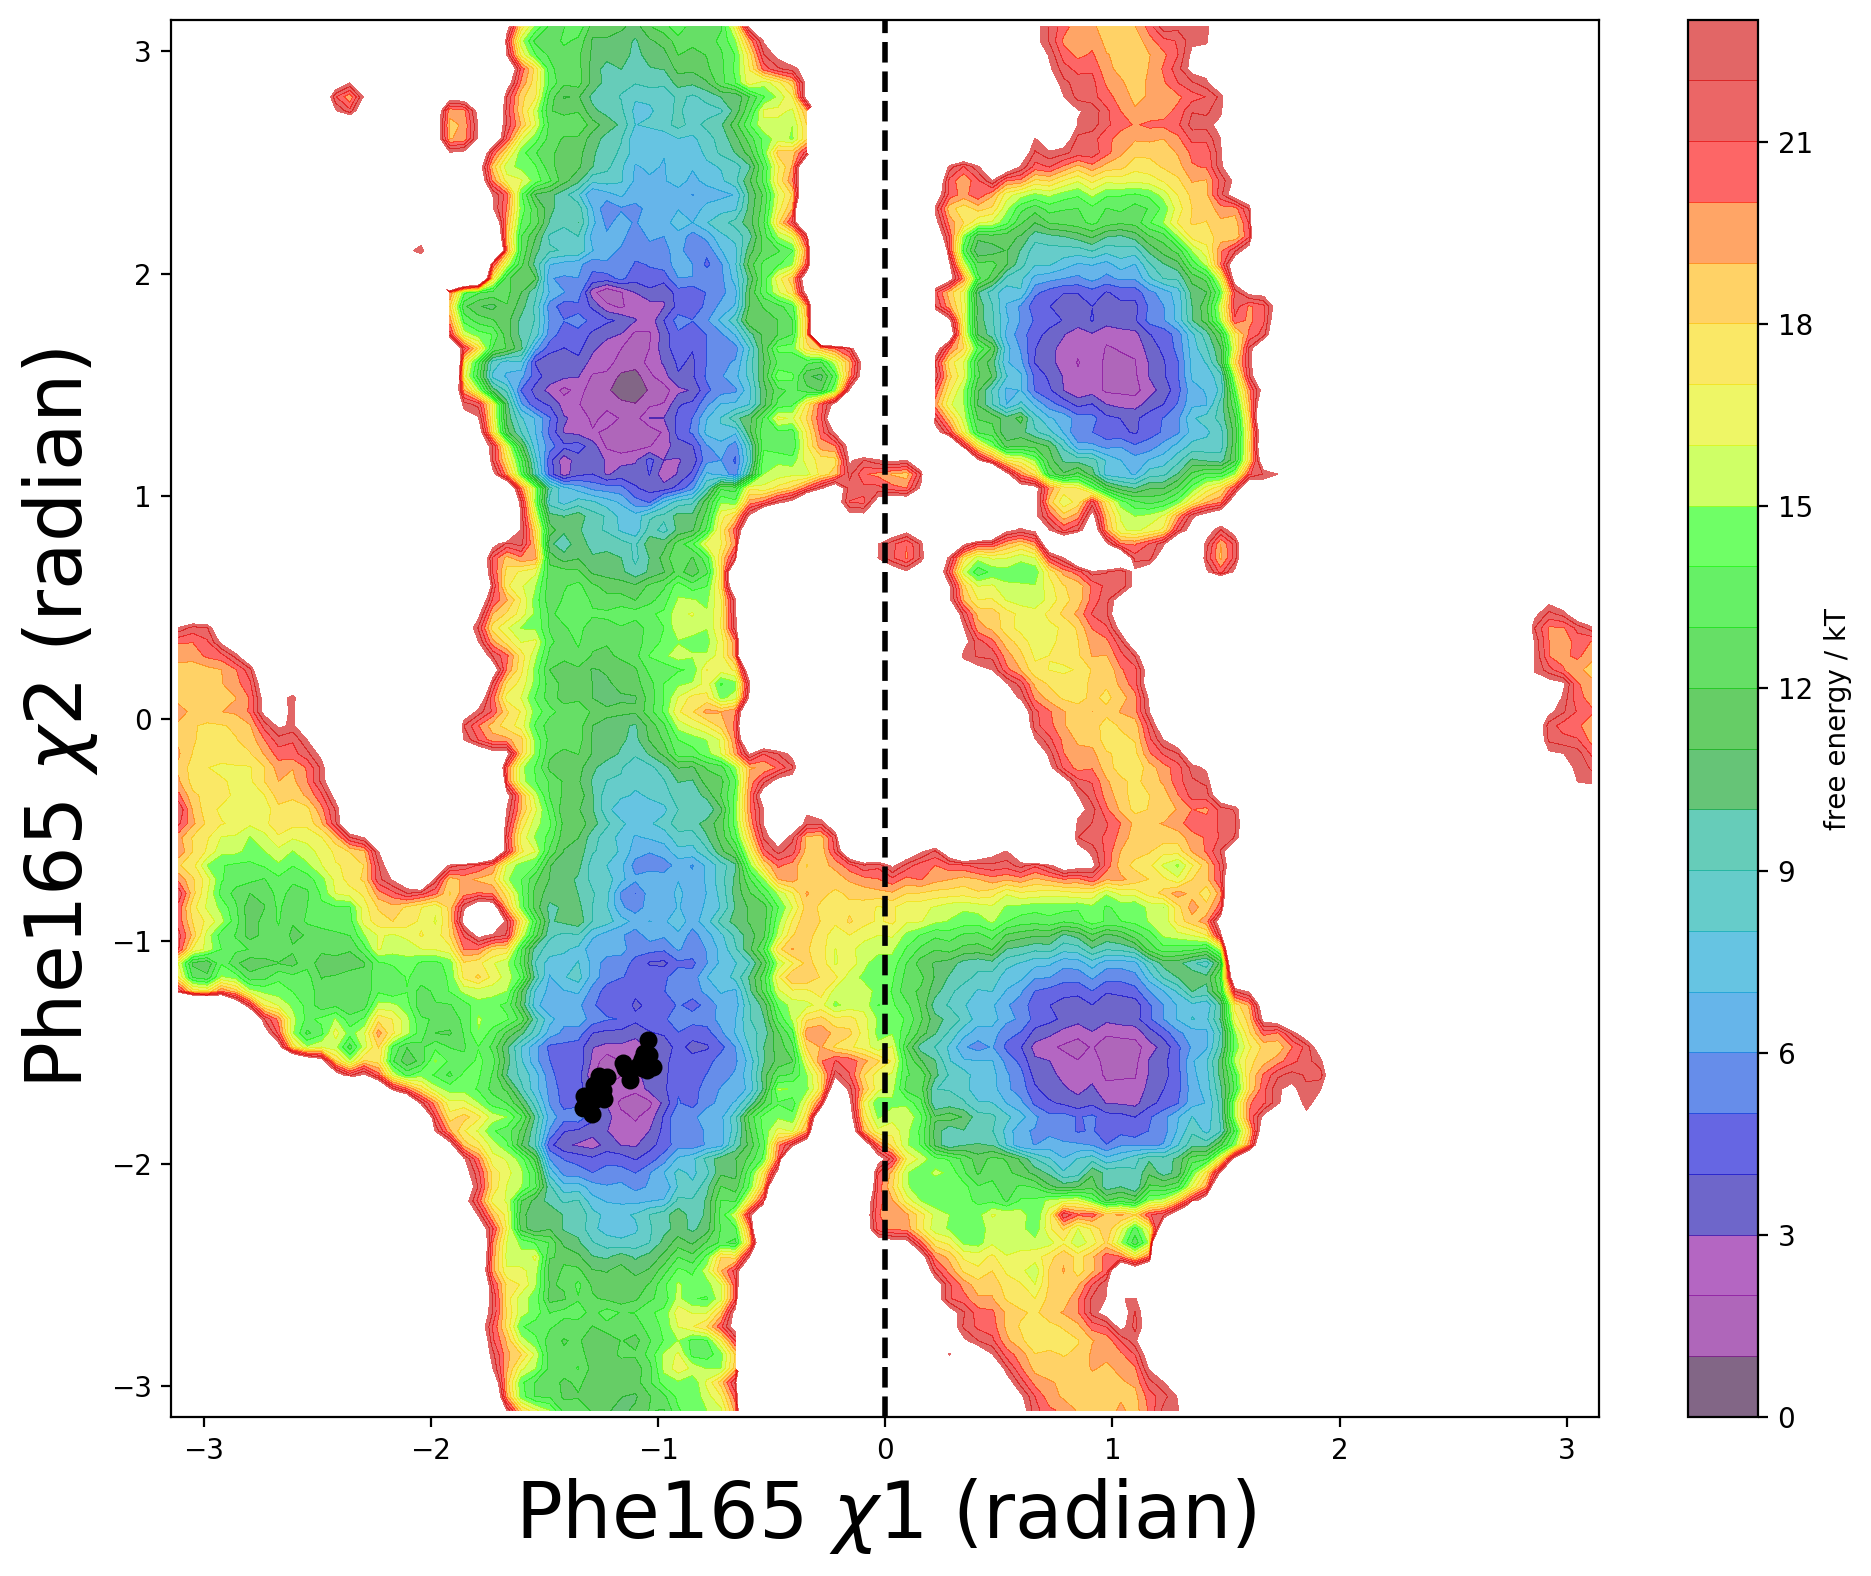

In [32]:
fig, ax = plt.subplots(figsize=(10, 8))
pyemma.plots.plot_free_energy(metad_fe_phe_chi1, metad_fe_phe_chi2, weights=metad_pophe, ax=ax, levels=np.arange(0, 24, 1), vmin=0, vmax=24, alpha=0.6)
ax.set_xlabel('Phe165 $\chi1$ (radian)', fontsize=28)
ax.set_ylabel('Phe165 $\chi2$ (radian)', fontsize=28)
ax.set_xlim(-np.pi, np.pi)
ax.set_ylim(-np.pi, np.pi)
#ax.set_title('Starting Normal')
ax.scatter(phechi1af, phechi2af, color='black', s=30, marker="o", label='Holo Xtals')
ax.axvline(x=0.0, color='black', linestyle='--', linewidth=2)
fig.tight_layout()
plt.show()

/Users/arghya/opt/anaconda3/envs/msmbuilder/lib/python3.6/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


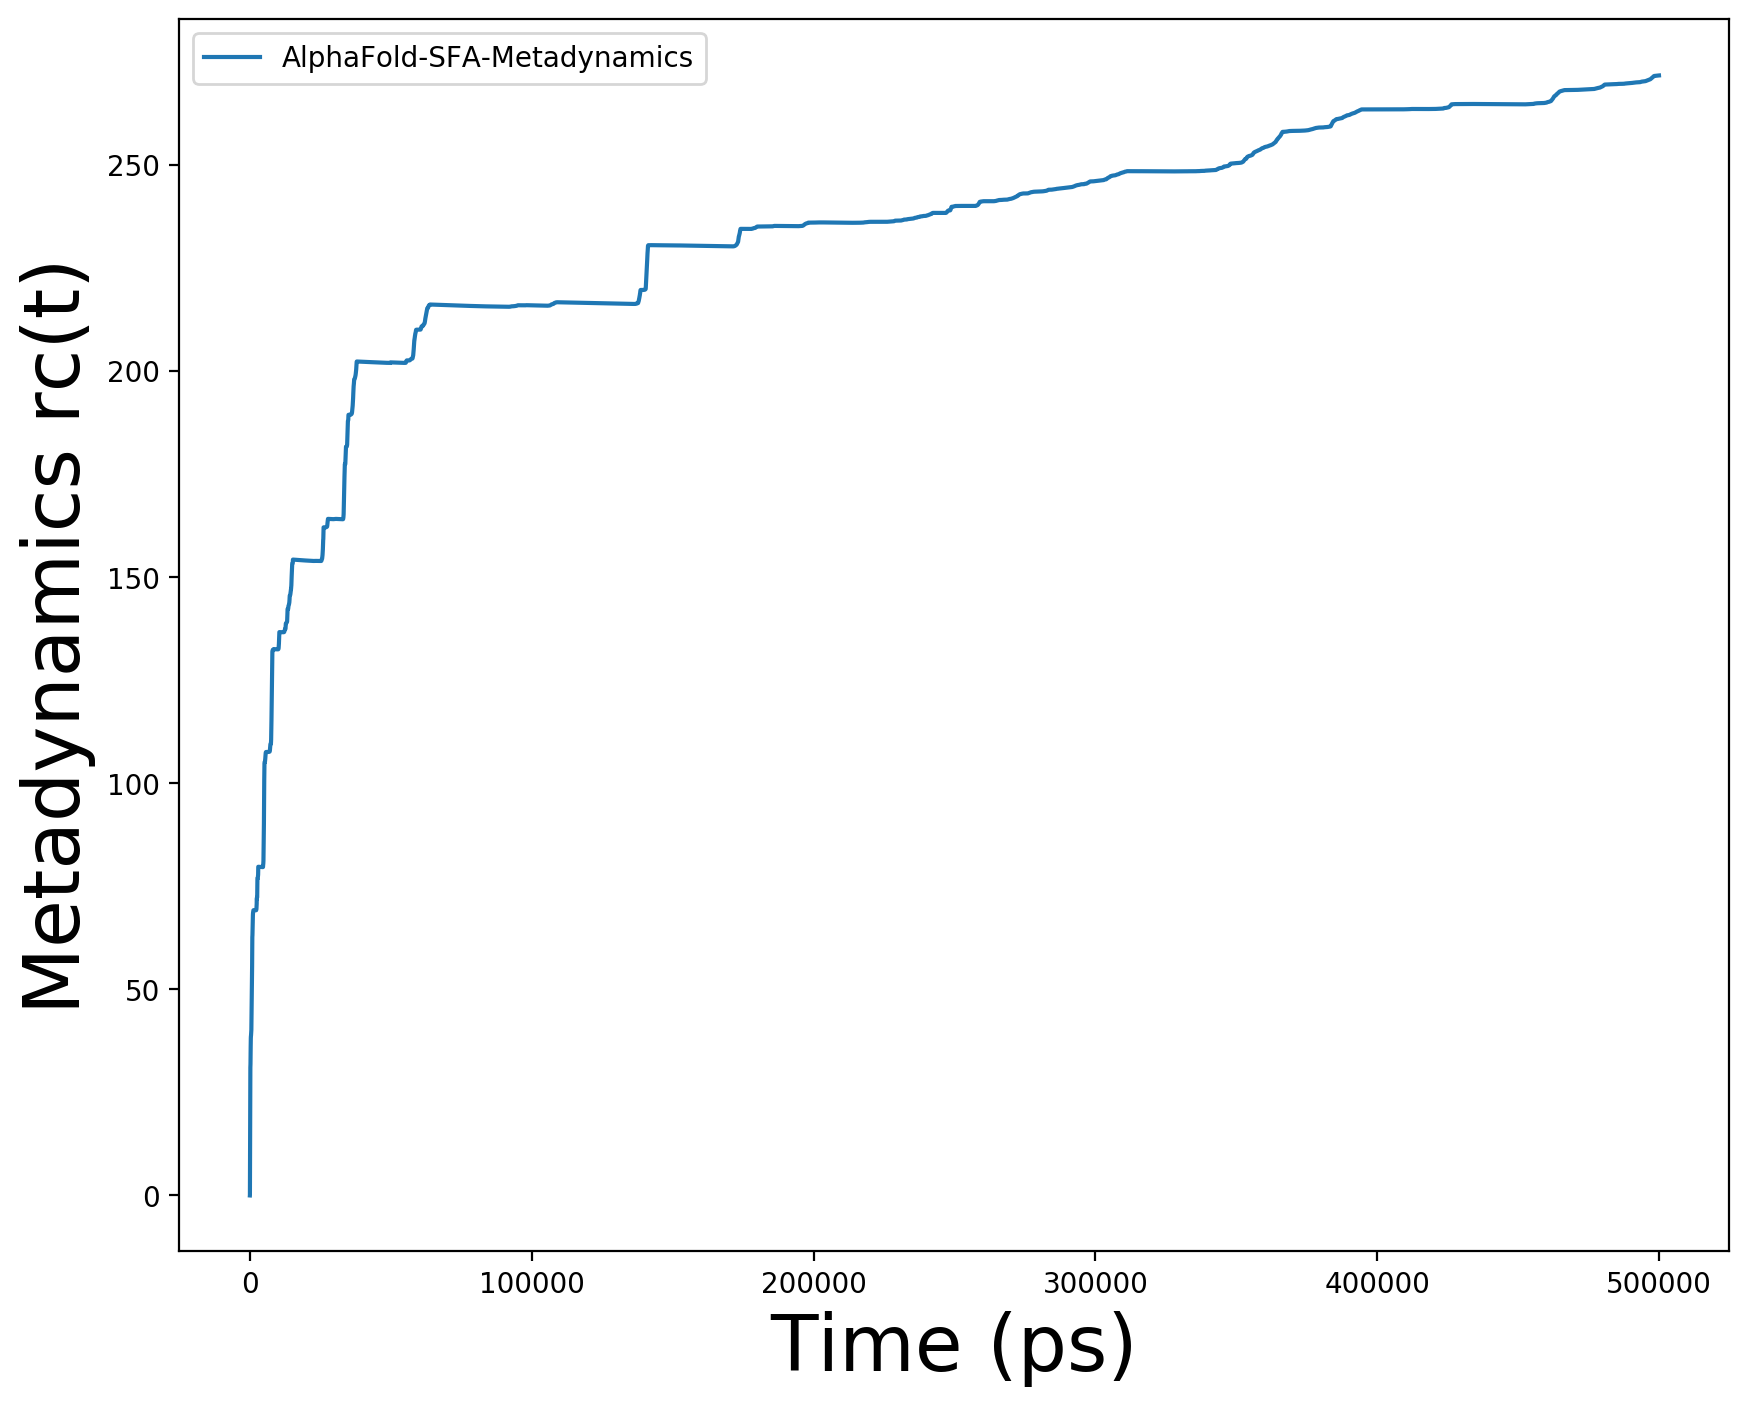

In [40]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.plot(ctmeta, '', label='AlphaFold-SFA-Metadynamics')
plt.xlabel('Time (ps)', fontsize=28)
ax.set_ylabel('Metadynamics rc(t)', fontsize=28)
#ax.set_ylim(0.2, 2.0)
#ax.axhline(y=0.82, color='black', linestyle='--', linewidth=2)
plt.legend()

plt.show()

## Molecular Dynamics simulation (500ns)

In [41]:
colvarmd=np.loadtxt('./MD/COLVAR-driver')

In [42]:
phechi1md=colvarmd[:, 3]
phechi2md=colvarmd[:, 4]
trpchi1md=colvarmd[:, 5]
trpchi2md=colvarmd[:, 6]
openmd=colvarmd[:, 10]
trpargmd=colvarmd[:, 9]

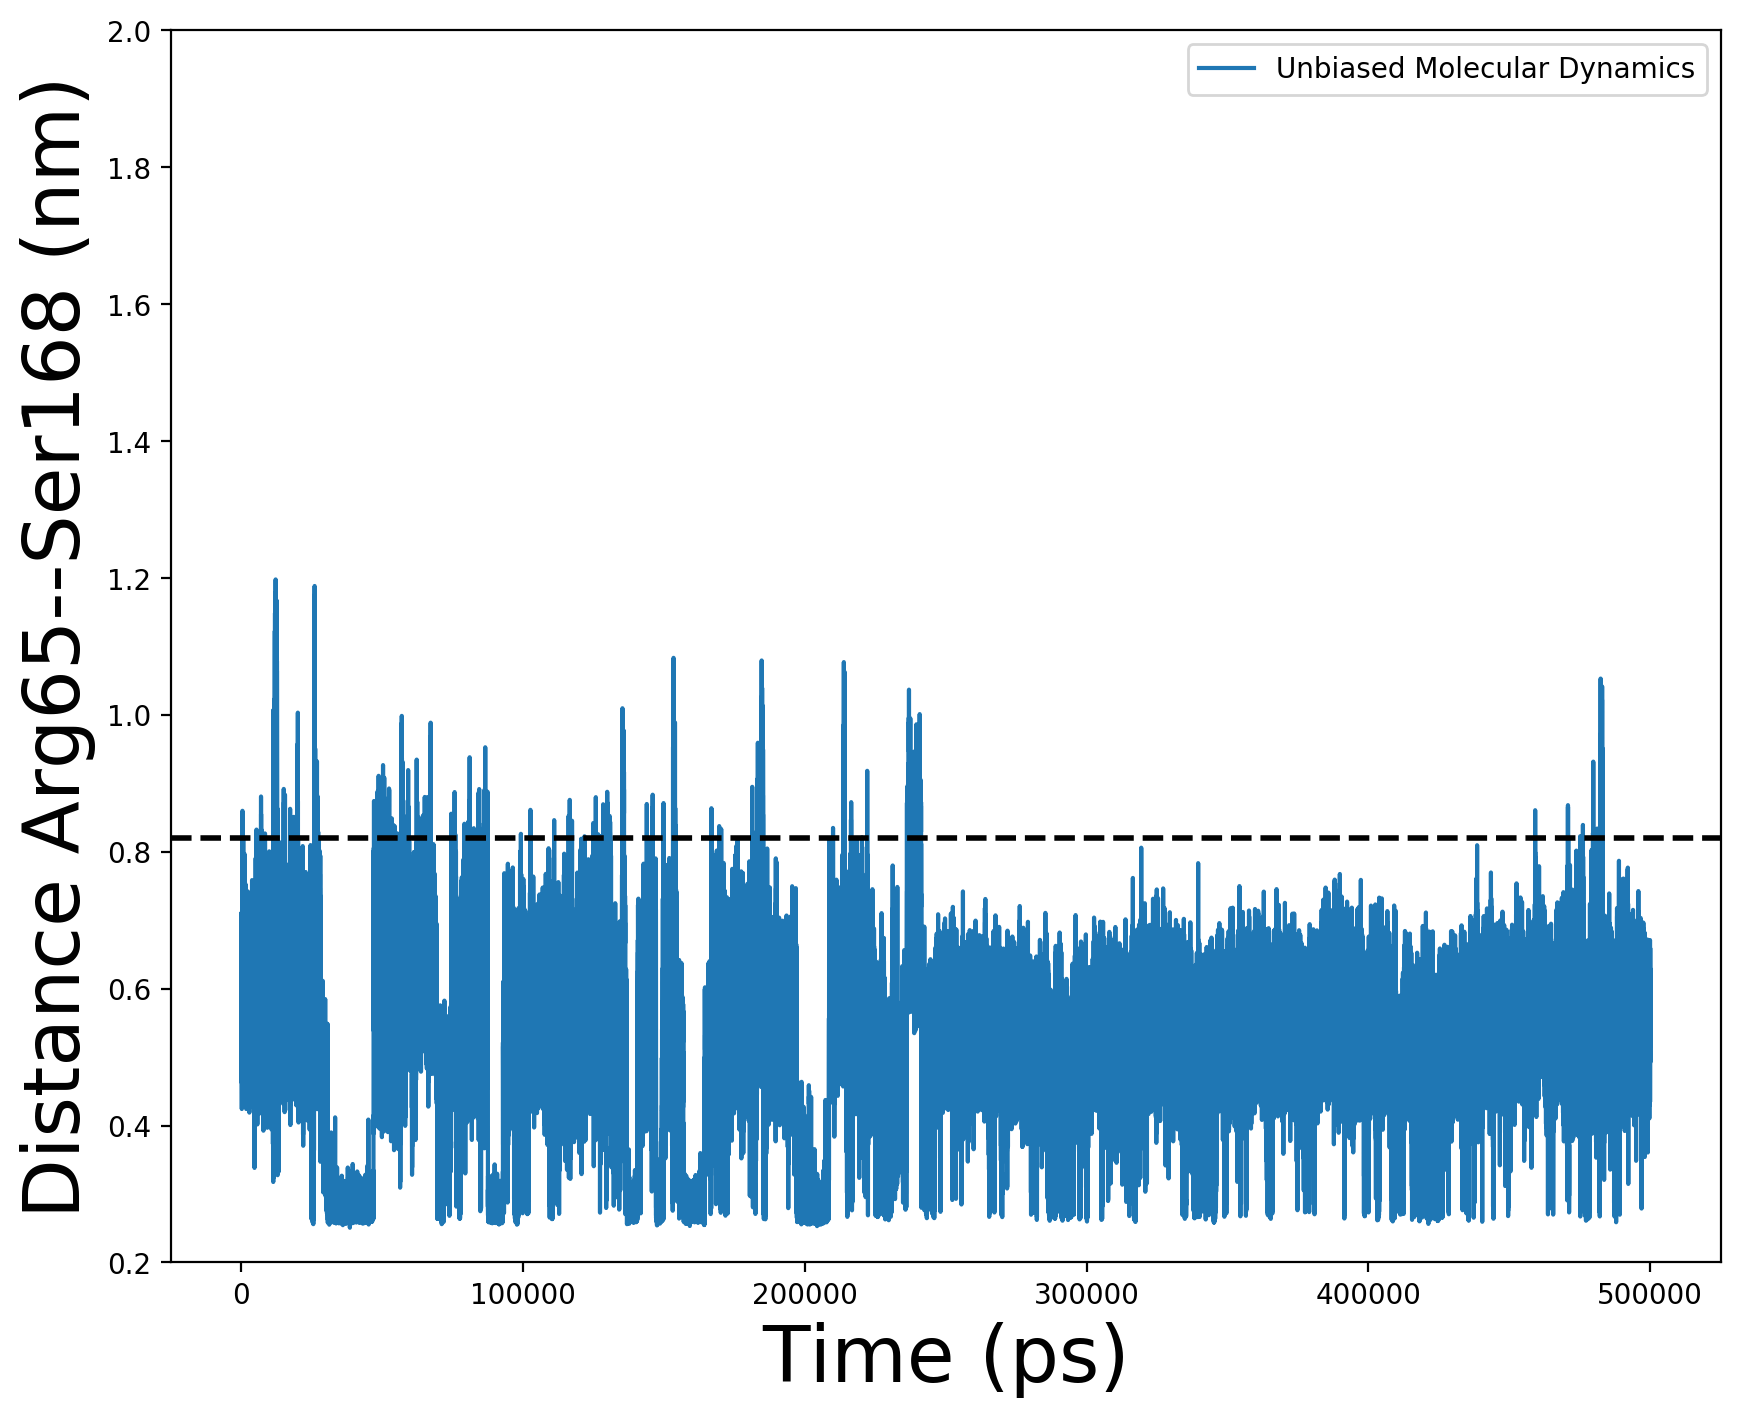

In [45]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.plot(trpargmd, '', label='Unbiased Molecular Dynamics')
plt.xlabel('Time (ps)', fontsize=28)
ax.set_ylabel('Distance Arg65--Ser168 (nm)', fontsize=28)
ax.set_ylim(0.2, 2.0)
ax.axhline(y=0.82, color='black', linestyle='--', linewidth=2)
plt.legend()

plt.show()

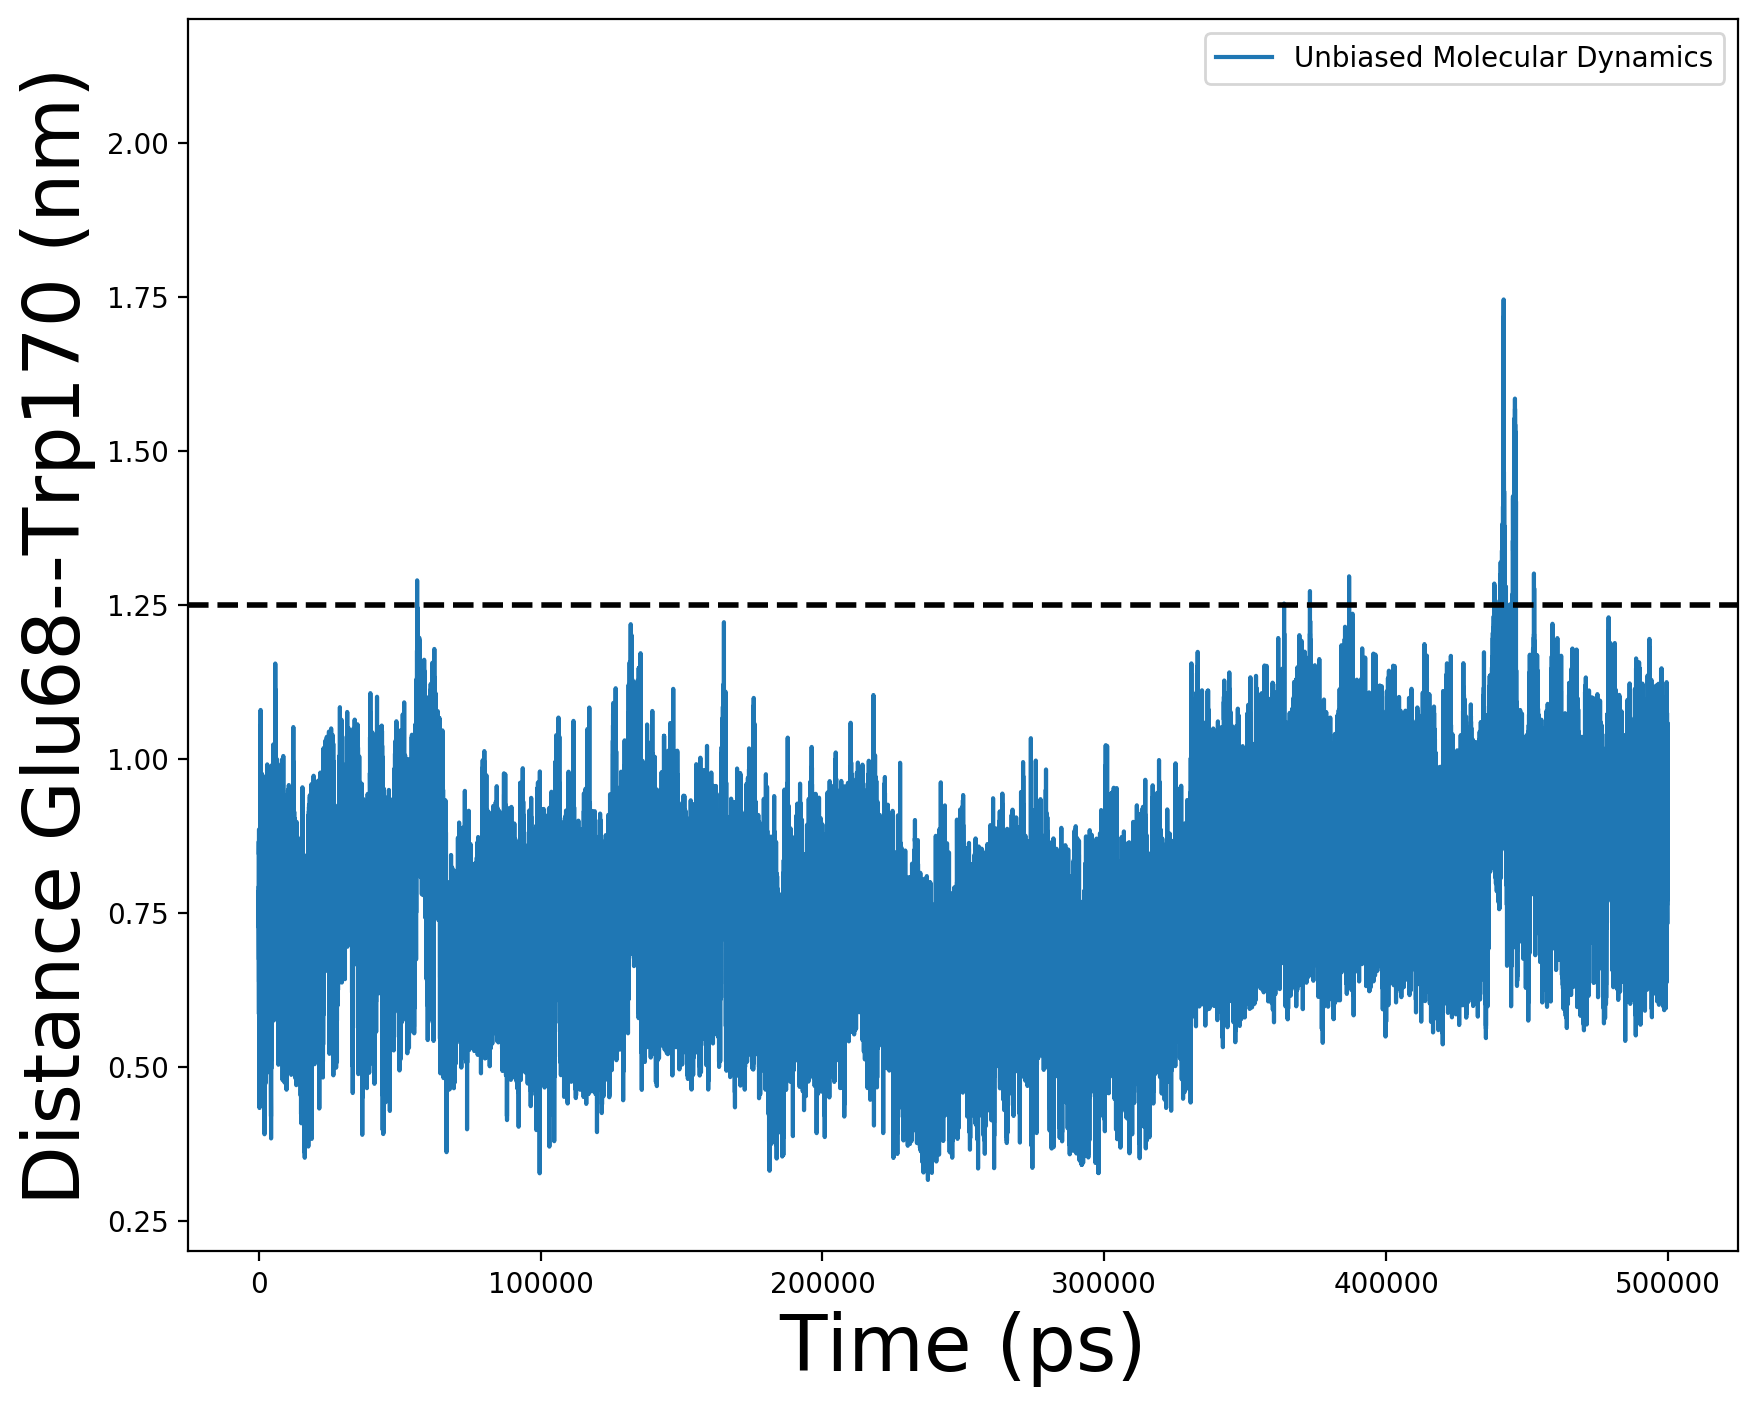

In [48]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.plot(openmd, '', label='Unbiased Molecular Dynamics')
plt.xlabel('Time (ps)', fontsize=28)
ax.set_ylabel('Distance Glu68--Trp170 (nm)', fontsize=28)
ax.set_ylim(0.2, 2.2)
ax.axhline(y=1.25, color='black', linestyle='--', linewidth=2)
plt.legend()

plt.show()

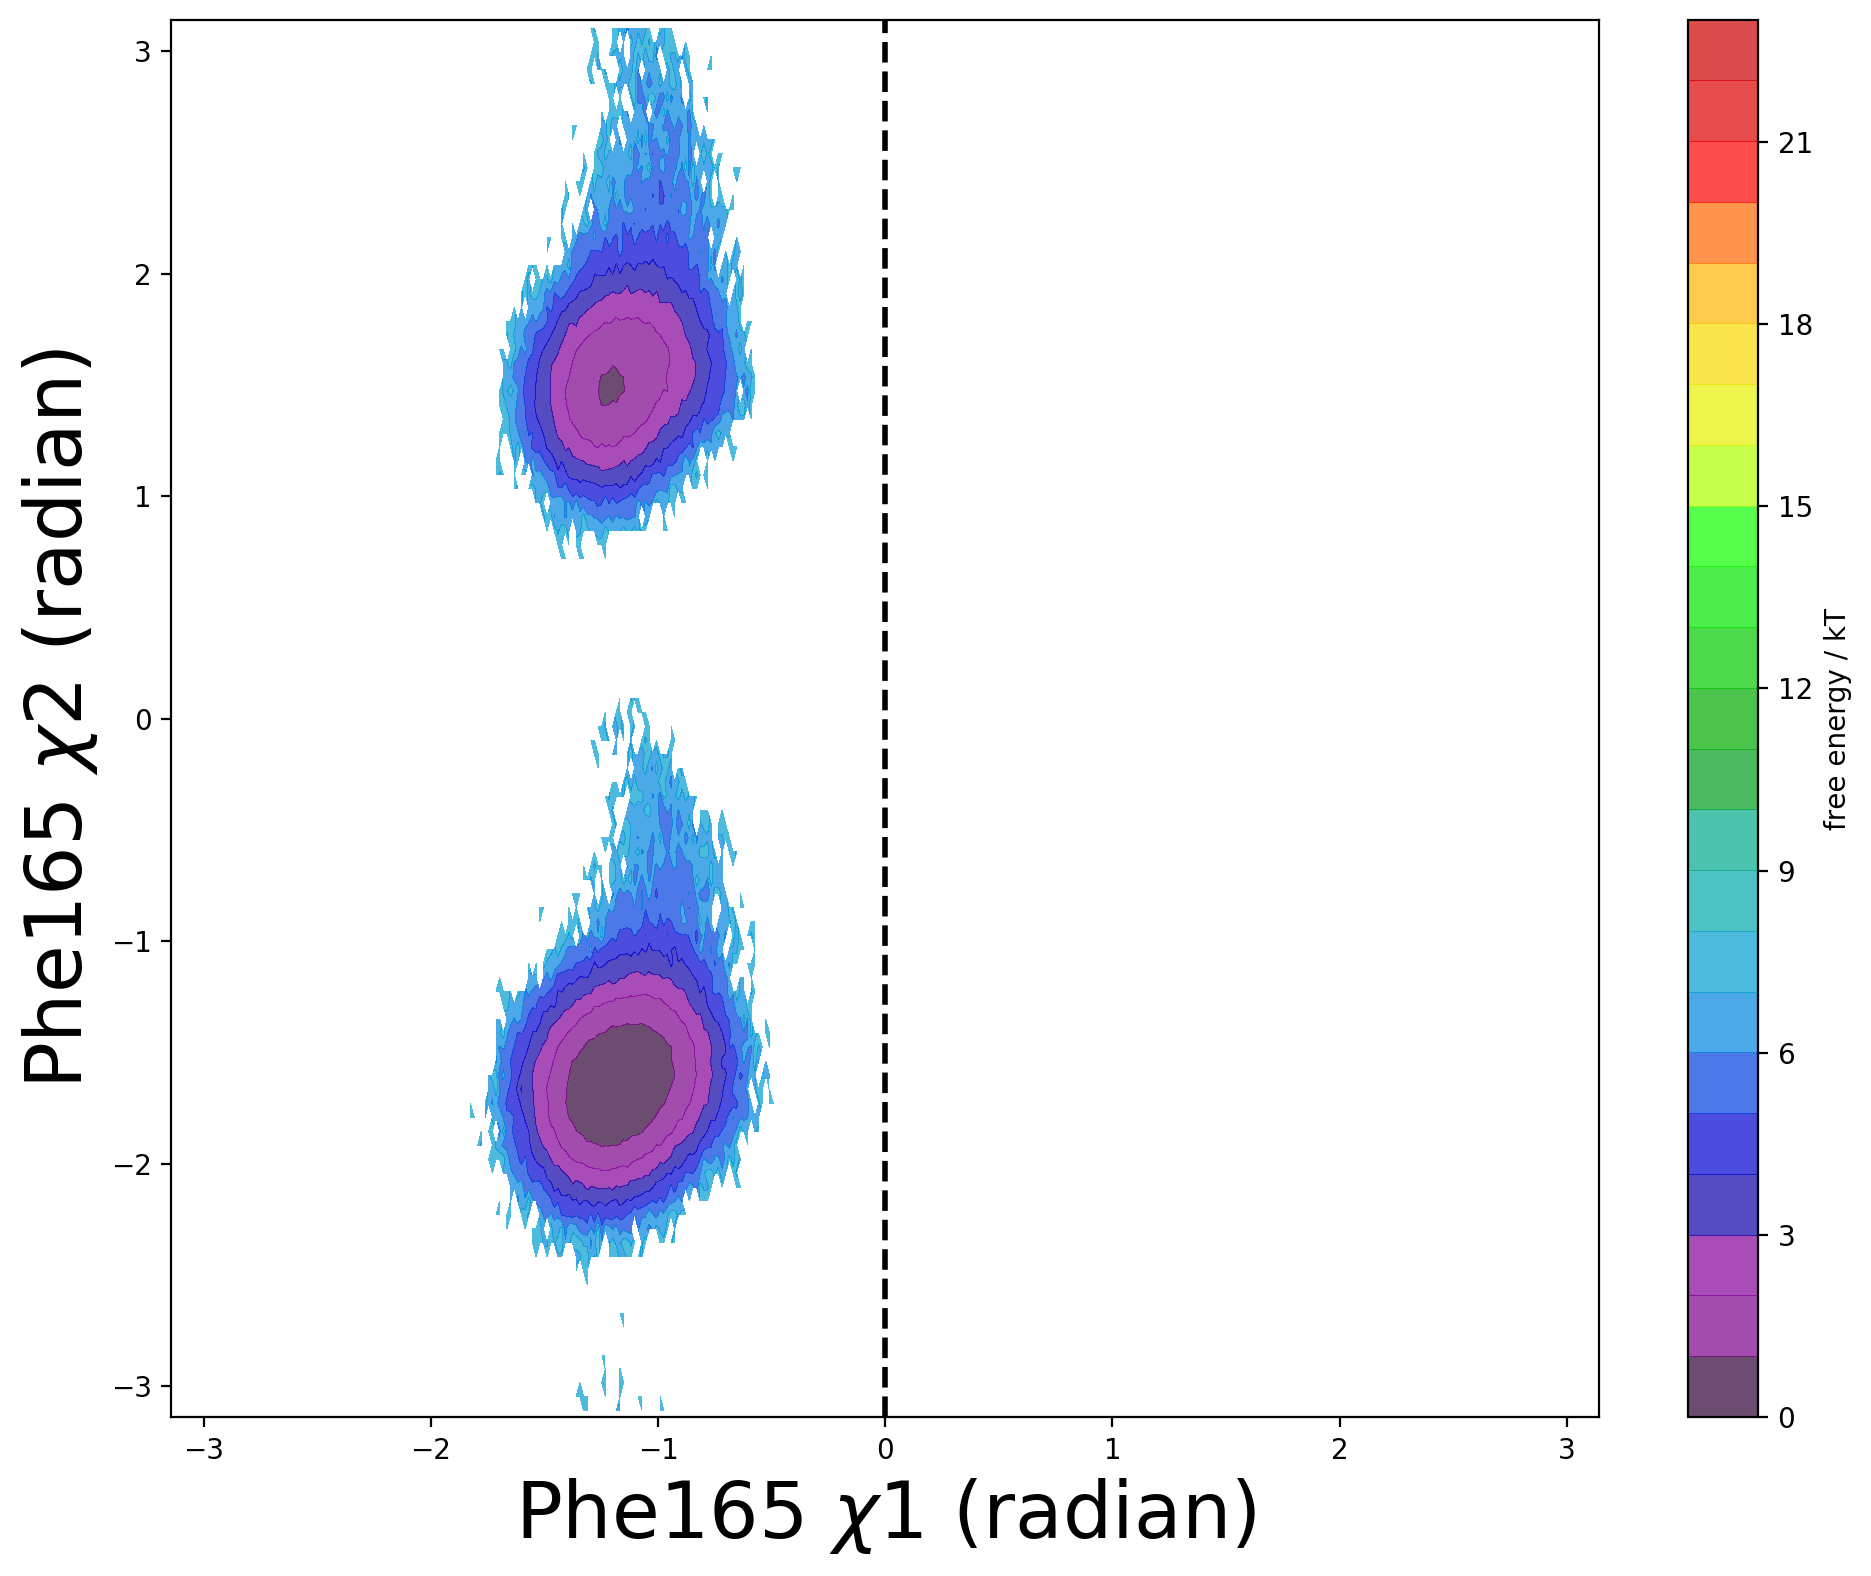

In [51]:
fig, ax = plt.subplots(figsize=(10, 8))
pyemma.plots.plot_free_energy(phechi1md, phechi2md, ax=ax, levels=np.arange(0, 24, 1), vmin=0, vmax=24, alpha=0.7)
ax.set_xlabel('Phe165 $\chi1$ (radian)', fontsize=28)
ax.set_ylabel('Phe165 $\chi2$ (radian)', fontsize=28)
ax.set_xlim(-np.pi, np.pi)
ax.set_ylim(-np.pi, np.pi)
#ax.set_title('Starting Normal')
#ax.scatter(phechi1, phechi2, color='black', s=30, marker="o", label='Holo Xtals')
ax.axvline(x=0.0, color='black', linestyle='--', linewidth=2)
fig.tight_layout()
plt.show()

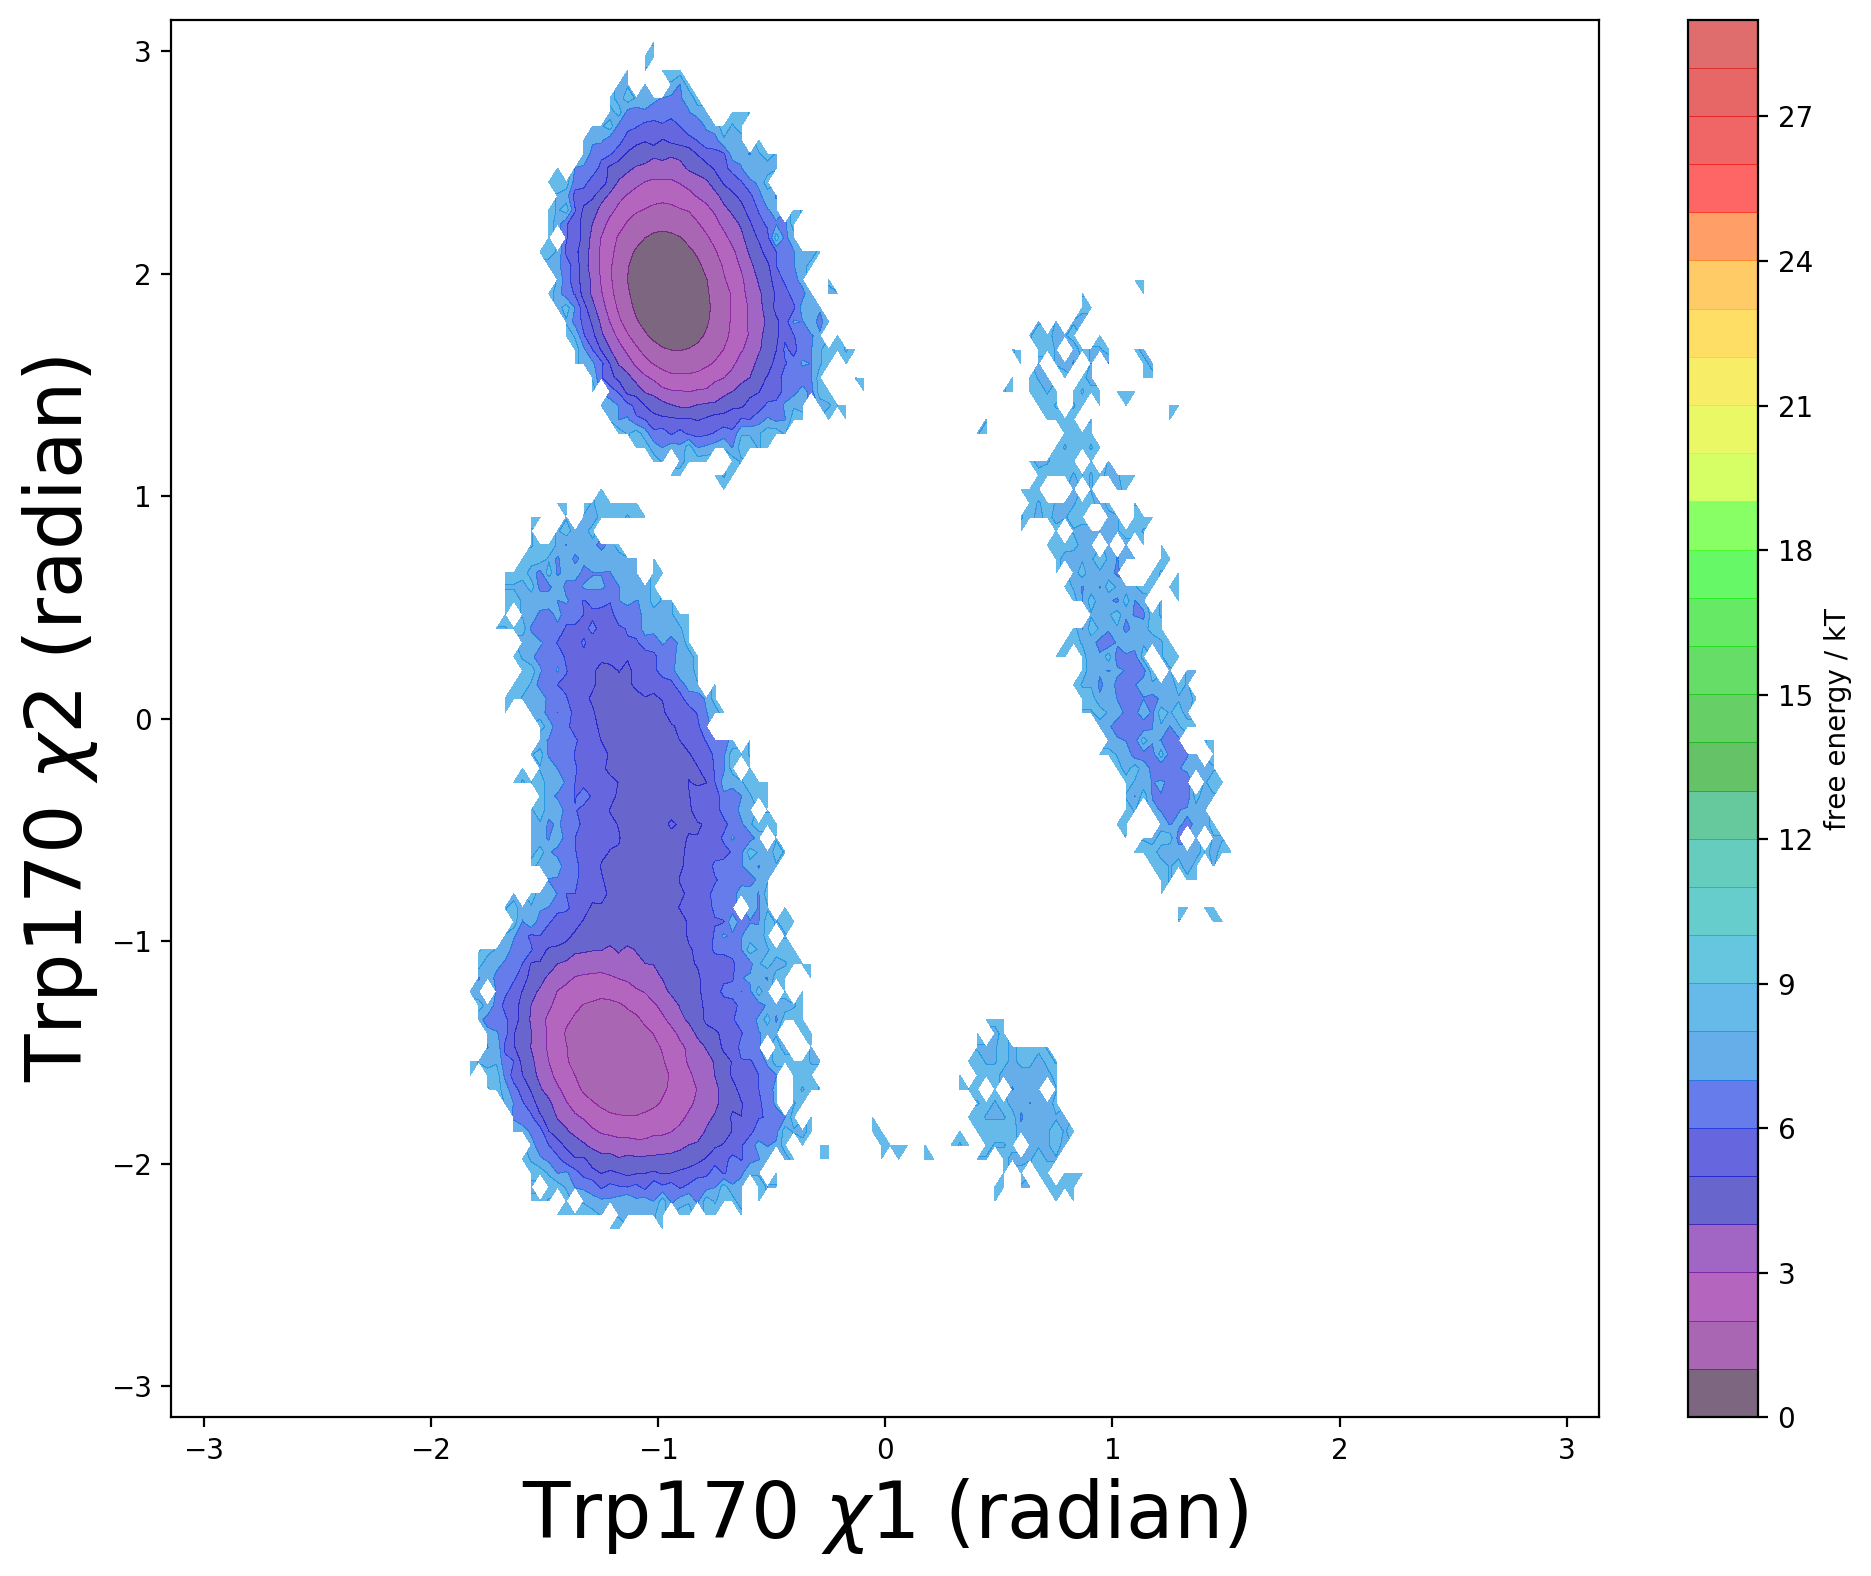

In [52]:
fig, ax = plt.subplots(figsize=(10, 8))
pyemma.plots.plot_free_energy(trpchi1md, trpchi2md, ax=ax, levels=np.arange(0, 30, 1), vmin=0, vmax=30, alpha=0.6)
ax.set_xlabel('Trp170 $\chi1$ (radian)', fontsize=28)
ax.set_ylabel('Trp170 $\chi2$ (radian)', fontsize=28)
ax.set_xlim(-np.pi, np.pi)
ax.set_ylim(-np.pi, np.pi)
#ax.set_title('Starting Normal')
#ax.scatter(phechi1, phechi2, color='black', s=30, marker="o", label='Holo Xtals')
#ax.scatter(trpchi1, trpchi2, color='black', s=30, marker="o", label='Holo Xtals')
fig.tight_layout()
plt.show()

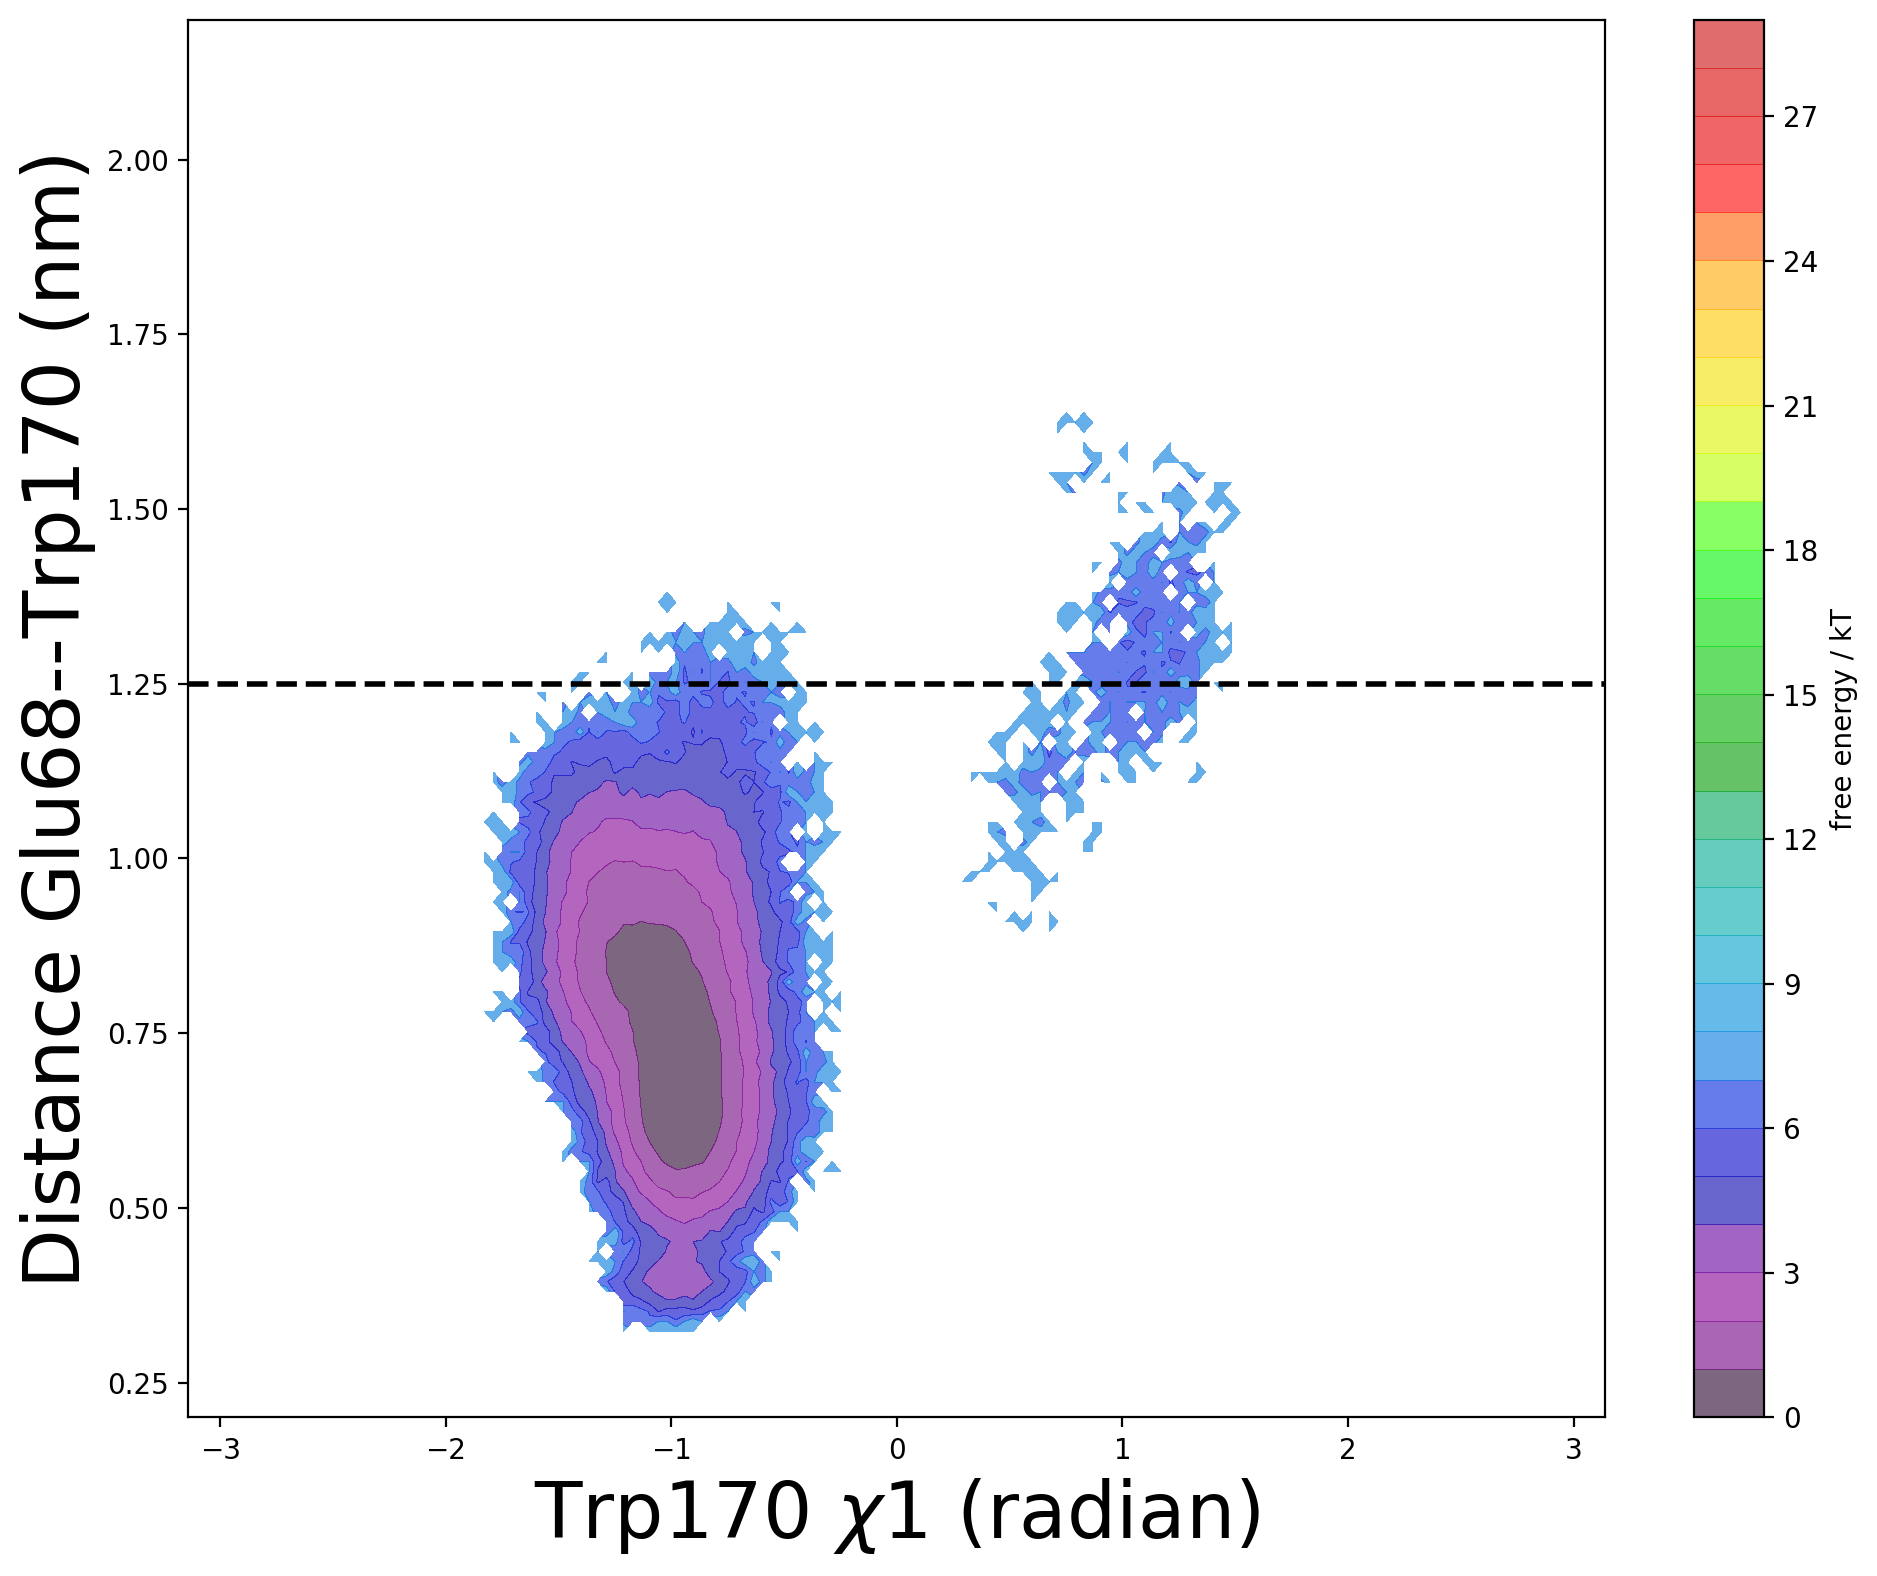

In [53]:
fig, ax = plt.subplots(figsize=(10, 8))
pyemma.plots.plot_free_energy(trpchi1md, openmd, ax=ax, levels=np.arange(0, 30, 1), vmin=0, vmax=30, alpha=0.6)
ax.set_xlabel('Trp170 $\chi1$ (radian)', fontsize=28)
ax.set_ylabel('Distance Glu68--Trp170 (nm)', fontsize=28)
ax.set_xlim(-np.pi, np.pi)
ax.set_ylim(0.2, 2.2)
#ax.set_title('Starting Normal')
#ax.scatter(phechi1, phechi2, color='black', s=30, marker="o", label='Holo Xtals')
#ax.scatter(trpchi1, trpchi2, color='black', s=30, marker="o", label='Holo Xtals')
ax.axhline(y=1.25, color='black', linestyle='--', linewidth=2)
fig.tight_layout()
plt.show()

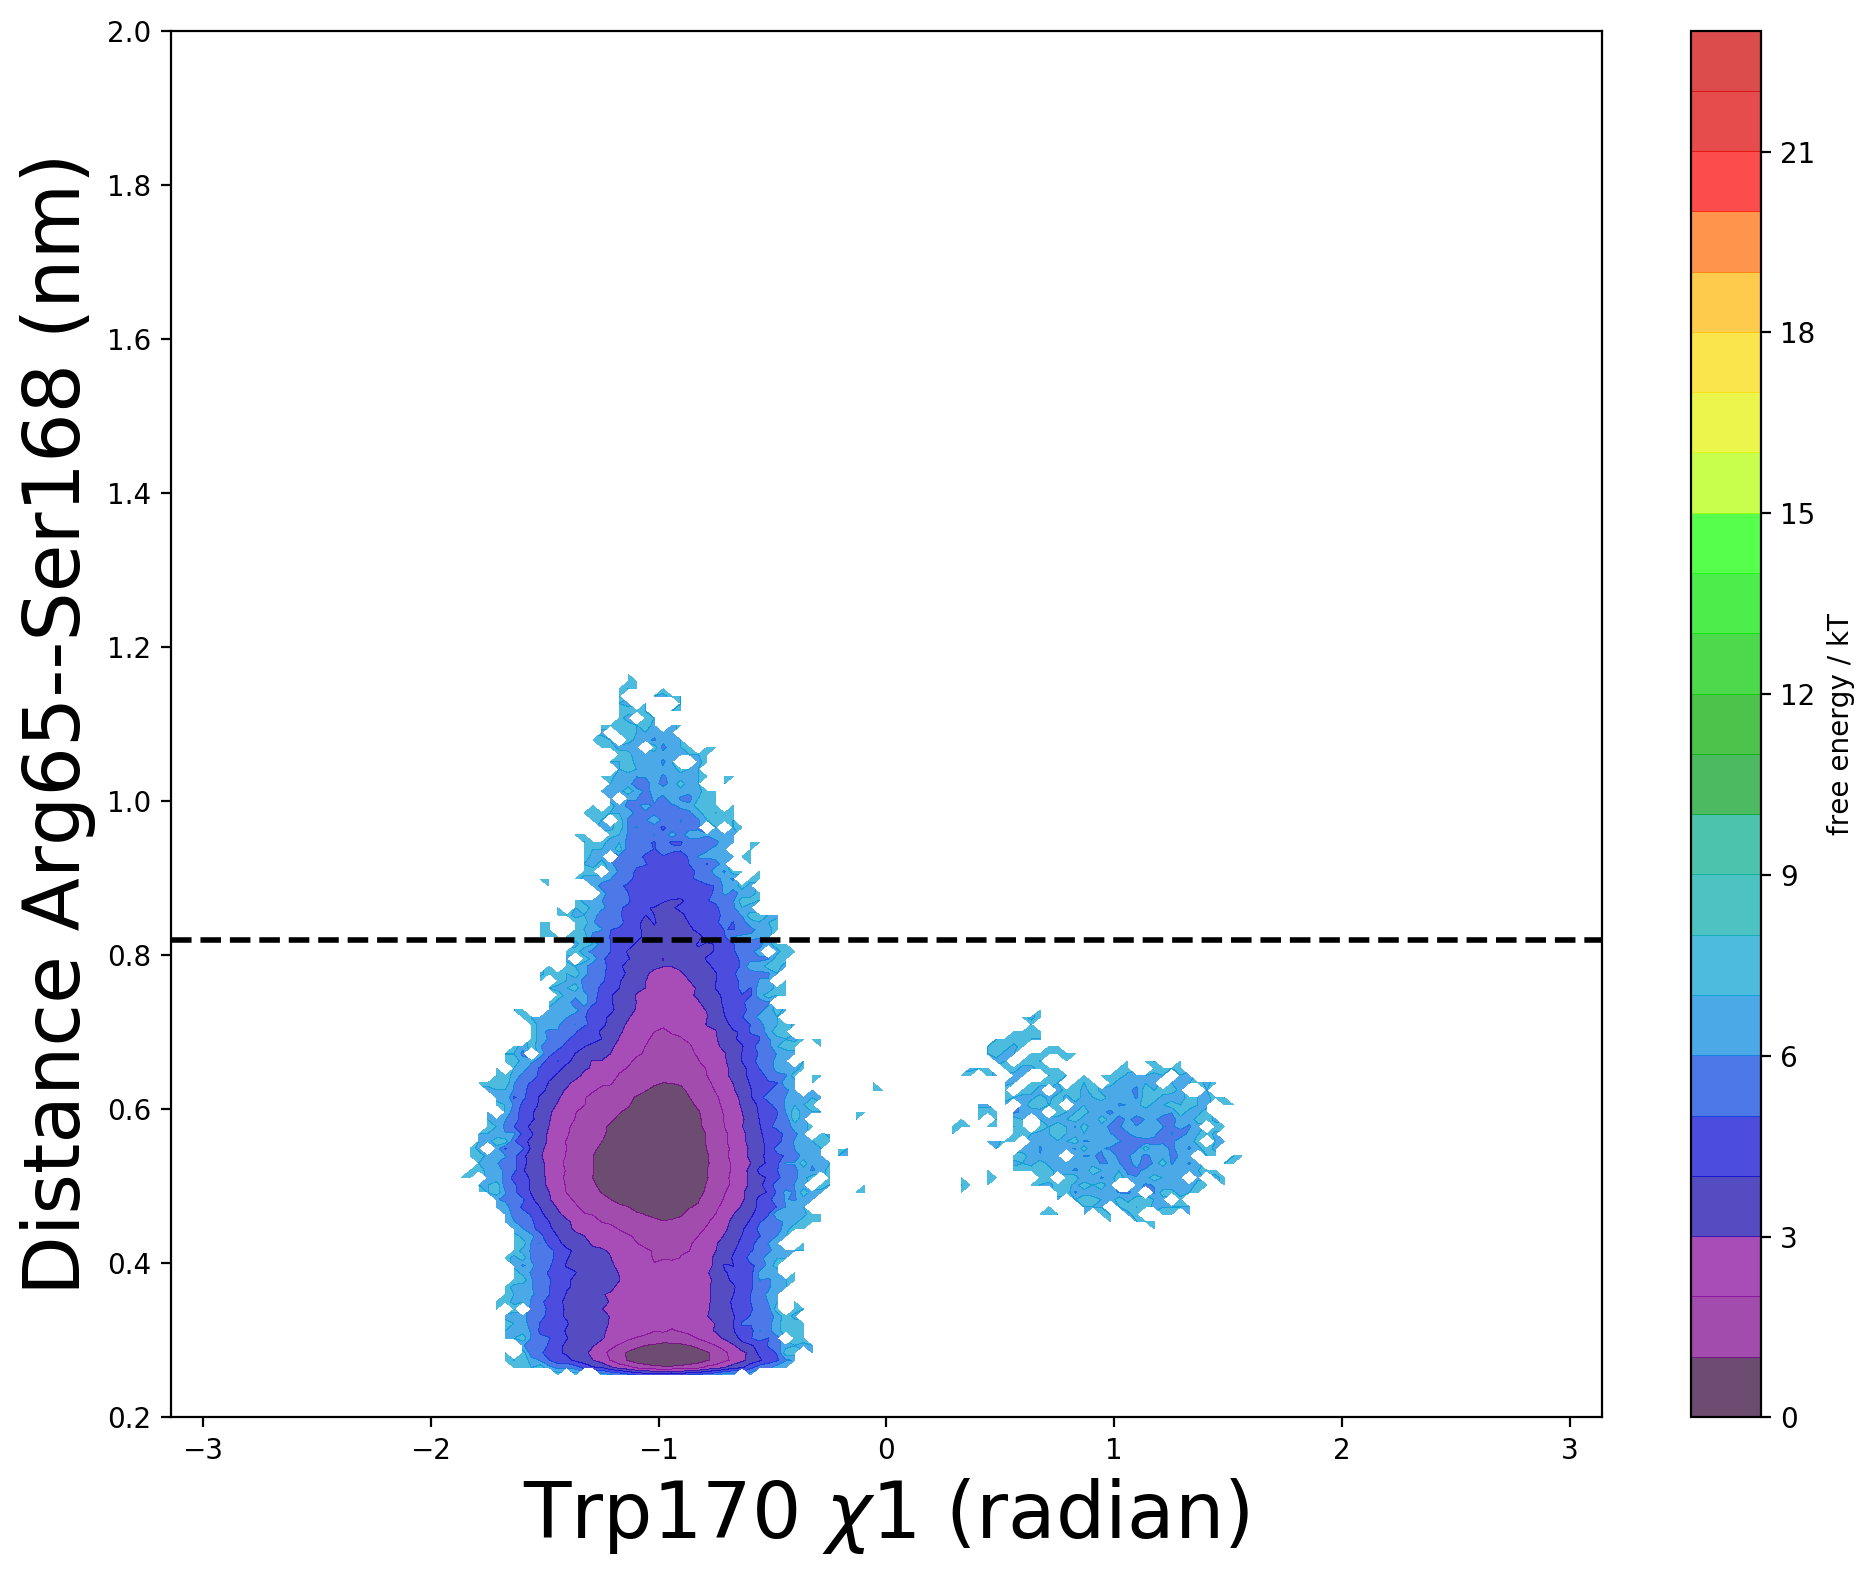

In [54]:
fig, ax = plt.subplots(figsize=(10, 8))
pyemma.plots.plot_free_energy(trpchi1md, trpargmd, ax=ax, levels=np.arange(0, 24, 1), vmin=0, vmax=24, alpha=0.7)
ax.set_xlabel('Trp170 $\chi1$ (radian)', fontsize=28)
ax.set_ylabel('Distance Arg65--Ser168 (nm)', fontsize=28)
ax.set_xlim(-np.pi, np.pi)
ax.set_ylim(0.2, 2.0)
#ax.set_title('Starting Normal')
ax.axhline(y=0.82, color='black', linestyle='--', linewidth=2)
#ax.scatter(trpchi1, trparg, color='black', s=30, marker="o", label='Holo Xtals')
fig.tight_layout()
plt.show()